<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/C%C3%B3pia_de_Fotometria_Estrelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Fotometria de Estrelas
### Este notebook lê um arquivo CSV contendo dados de fotometria de estrelas e visualiza as 10 primeiras fotometrias como gráficos de linhas.

### 1. Importação das Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

### 2. Leitura do Arquivo CSV

In [3]:
# Carregamos o arquivo CSV em um DataFrame do Pandas.

df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
print(f"O número total de estrelas é: {numero_estrelas}")

O número total de estrelas é: 17378


### 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos.

In [4]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


### 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [5]:
#A coluna `MAG_APER_COR_3_0` contém múltiplos valores separados por espaços. Vamos dividi-la em 57 colunas separadas.
#Criamos uma lista de nomes para as novas colunas.

colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [6]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [7]:
#Dividimos a coluna `MAG_APER_COR_3_0` em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)

In [8]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)

In [9]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


### 5. Visualização das 10 Primeiras Fotometrias

O objetivo deste item é visualizar as magnitudes fotométricas das 10 primeiras estrelas em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

In [10]:
#Vamos plotar as 10 primeiras fotometrias como gráficos de linhas.
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

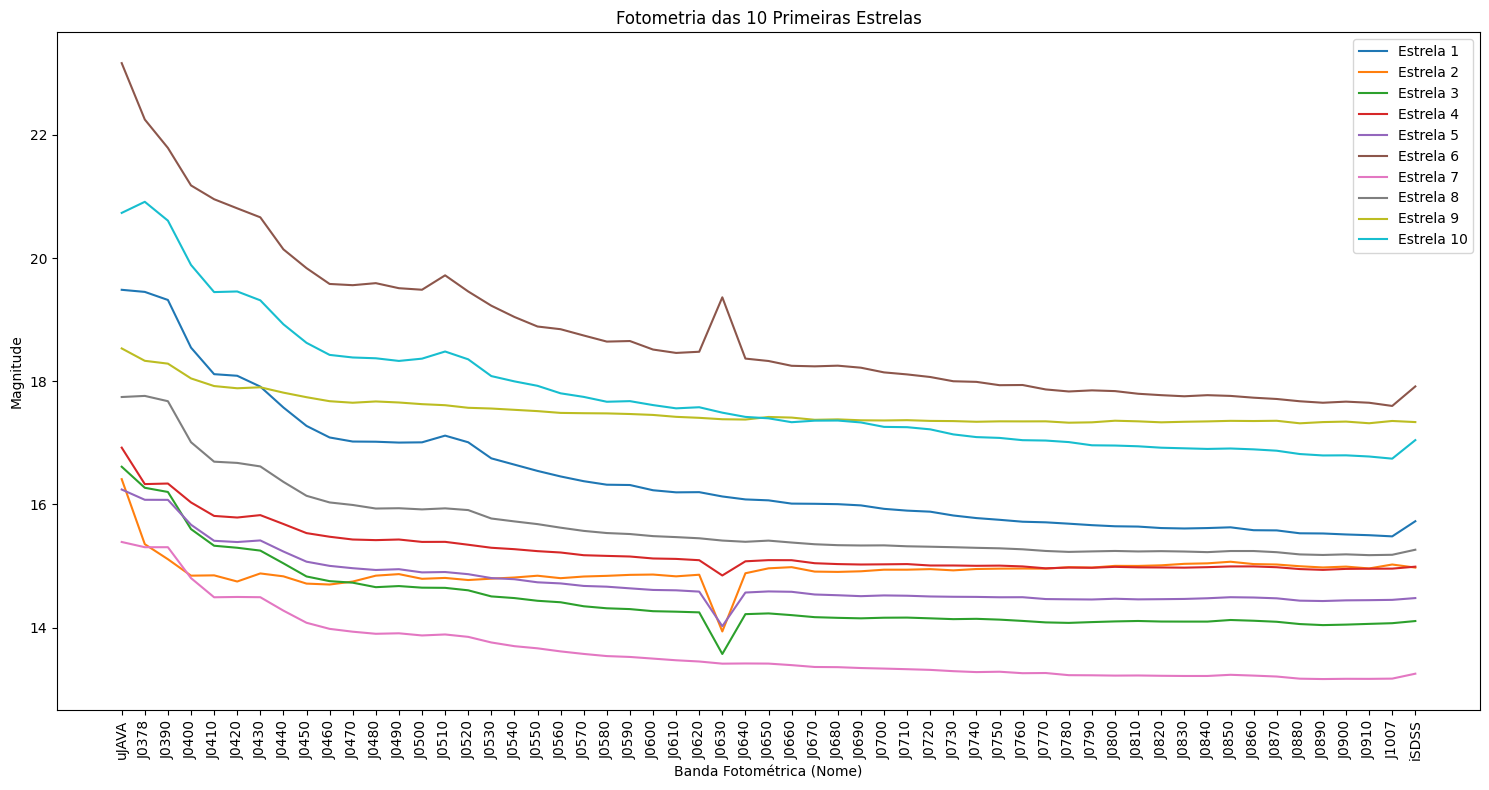

In [11]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

#Loop para plotar as 10 primeiras estrelas.

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 primeiras estrelas
for i in range(10):
    plt.plot(filter_names, df.loc[i, columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria das 10 Primeiras Estrelas')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### 6. Visualização de 10 Fotometrias de estrelas aleatórias

O objetivo deste item é visualizar as magnitudes fotométricas de 10 estrelas aleatórias em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

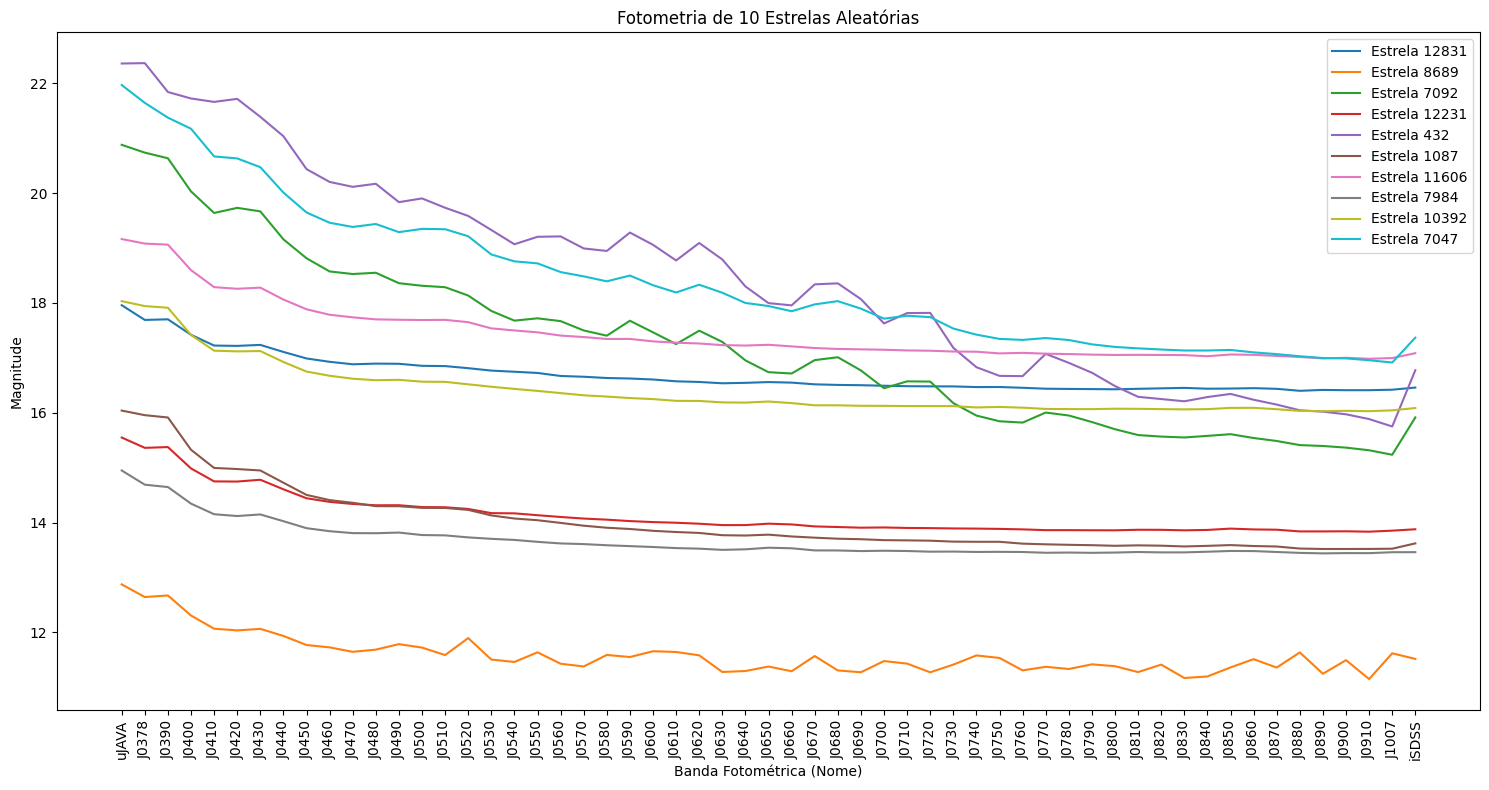

In [12]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Selecionar 10 estrelas aleatórias
random_stars = df.sample(n=10, random_state=42)  # random_state para reprodutibilidade

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 estrelas aleatórias
for i, row in random_stars.iterrows():
    plt.plot(filter_names, row[columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria de 10 Estrelas Aleatórias')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Análise dos Resultados

1. **Estrutura do Gráfico**:
   - O eixo X representa as **57 bandas fotométricas**, numeradas de 1 a 57.
   - O eixo Y representa as **magnitudes** das estrelas em cada banda fotométrica.
   - Cada linha no gráfico corresponde a uma das 10 primeiras estrelas do DataFrame.

2. **Legibilidade do Eixo X**:
   - Os rótulos do eixo X foram simplificados para mostrar apenas os números de 1 a 57, em vez dos nomes completos das colunas (como "Fotometria_1", "Fotometria_2", etc.).
   - Os rótulos foram rotacionados em 90 graus (`rotation=90`) para evitar sobreposição, garantindo que todos os números sejam visíveis.

3. **Comportamento das Curvas**:
   - Cada curva no gráfico mostra como a magnitude de uma estrela varia ao longo das 57 bandas fotométricas.
   - Estrelas com magnitudes mais baixas (valores menores no eixo Y) são mais brilhantes, enquanto magnitudes mais altas indicam estrelas mais fracas.
   - Se houver padrões semelhantes entre as curvas, isso pode indicar que as estrelas têm propriedades fotométricas semelhantes (por exemplo, pertencerem à mesma classe espectral ou estágio evolutivo).

4. **Legenda**:
   - A legenda identifica cada estrela pelo número correspondente (de 1 a 10).
   - Isso permite comparar facilmente o comportamento fotométrico de cada estrela.

5. **Melhorias na Visualização**:
   - O uso de `plt.tight_layout()` garante que o gráfico seja renderizado sem sobreposição de elementos.
   - O tamanho da figura (`figsize=(15, 8)`) foi aumentado para acomodar melhor os 57 rótulos no eixo X.


#### **Interpretação dos Dados**

- **Variação nas Magnitudes**:
  - Se as curvas das estrelas forem semelhantes, isso sugere que as estrelas têm propriedades fotométricas parecidas.
  - Se houver grandes diferenças entre as curvas, isso pode indicar que as estrelas têm características distintas (como temperaturas diferentes, estágios evolutivos diferentes ou presença de poeira interestelar).

- **Picos ou Vales**:
  - Picos (aumentos repentinos na magnitude) ou vales (quedas repentinas) podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão.

- **Comparação entre Estrelas**:
  - Estrelas com magnitudes consistentemente mais baixas (mais brilhantes) em todas as bandas podem ser estrelas mais próximas ou intrinsecamente mais luminosas.
  - Estrelas com magnitudes mais altas (mais fracas) podem ser estrelas mais distantes ou menos luminosas.

#### **Conclusão**

O gráfico fornece uma visão clara do comportamento fotométrico das 10 primeiras estrelas ao longo das 57 bandas fotométricas. A partir da análise, podemos inferir:

1. **Propriedades Físicas**:
   - As diferenças nas magnitudes ao longo das bandas fotométricas podem ser usadas para inferir propriedades como temperatura, luminosidade e composição química das estrelas.

2. **Classificação Estelar**:
   - Estrelas com curvas semelhantes podem pertencer à mesma classe espectral ou estágio evolutivo.

3. **Anomalias**:
   - Picos ou vales nas curvas podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão, que podem ser investigadas em análises mais detalhadas.

### 7. Normalização dos dados

#### 7.1. Identificar as Bandas Jxxx e iSDSS

In [13]:
# Encontrar índices das bandas J (ex: J0378, J0395, etc.) e iSDSS
bandas_j = [i for i, nome in enumerate(filter_names) if nome.startswith('J')]
banda_i = [i for i, nome in enumerate(filter_names) if 'iSDSS' in nome][0]  # Assume que existe exatamente uma banda iSDSS

print("Bandas J disponíveis:", [filter_names[i] for i in bandas_j])
print("Banda iSDSS usada para normalização:", filter_names[banda_i])

Bandas J disponíveis: ['J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540', 'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630', 'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720', 'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810', 'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900', 'J0910', 'J1007']
Banda iSDSS usada para normalização: iSDSS


#### 7.2 . Calcular Cores Jxxx - iSDSS para Todas as Bandas

Subtrair o valor de iSDSS de todas as bandas de cada estrela:

In [14]:
# Criar DataFrame para cores normalizadas (Jxxx - iSDSS)
cores_normalizadas = pd.DataFrame()

for i in range(57):  # 57 bandas fotométricas
    nome_banda = filter_names[i]
    cores_normalizadas[nome_banda] = df[f'Fotometria_{i+1}'] - df[f'Fotometria_{banda_i+1}']  # Subtrai iSDSS

# Visualizar as primeiras linhas
print("\nDataFrame de cores normalizadas (Jxxx - iSDSS):")
print(cores_normalizadas.head())


DataFrame de cores normalizadas (Jxxx - iSDSS):
   uJAVA  J0378  J0390  J0400  J0410  J0420  J0430  J0440  J0450  J0460  ...  \
0  3.758  3.724  3.593  2.819  2.388  2.362  2.186  1.847  1.548  1.360  ...   
1  1.436  0.380  0.136 -0.131 -0.126 -0.226 -0.095 -0.142 -0.260 -0.275  ...   
2  2.506  2.164  2.096  1.493  1.223  1.190  1.144  0.937  0.724  0.648  ...   
3  1.933  1.341  1.350  1.043  0.824  0.798  0.837  0.693  0.545  0.486  ...   
4  1.763  1.596  1.595  1.191  0.930  0.910  0.936  0.756  0.591  0.523  ...   

   J0840  J0850  J0860  J0870  J0880  J0890  J0900  J0910  J1007  iSDSS  
0 -0.111 -0.099 -0.146 -0.149 -0.196 -0.199 -0.215 -0.227 -0.246    0.0  
1  0.069  0.095  0.057  0.050  0.022  0.002  0.016 -0.014  0.050    0.0  
2 -0.009  0.017  0.005 -0.012 -0.049 -0.066 -0.058 -0.046 -0.035    0.0  
3 -0.008  0.004  0.004 -0.009 -0.039 -0.052 -0.036 -0.033 -0.032    0.0  
4 -0.003  0.014  0.009 -0.004 -0.042 -0.048 -0.037 -0.034 -0.029    0.0  

[5 rows x 57 columns]


#### 7.3. Calcular Cores Normalizadas (Jxxx - iSDSS)

In [15]:
# Encontrar o índice da banda iSDSS
banda_i = [i for i, nome in enumerate(filter_names) if 'iSDSS' in nome][0]  # Assume que existe exatamente uma banda iSDSS

# Calcular cores normalizadas (Jxxx - iSDSS) para todas as bandas
cores_normalizadas = pd.DataFrame()
for i in range(57):
    nome_banda = filter_names[i]
    cores_normalizadas[nome_banda] = df[f'Fotometria_{i+1}'] - df[f'Fotometria_{banda_i+1}']

#### 7.4. Plotar as 10 Primeiras Estrelas (Normalizadas)

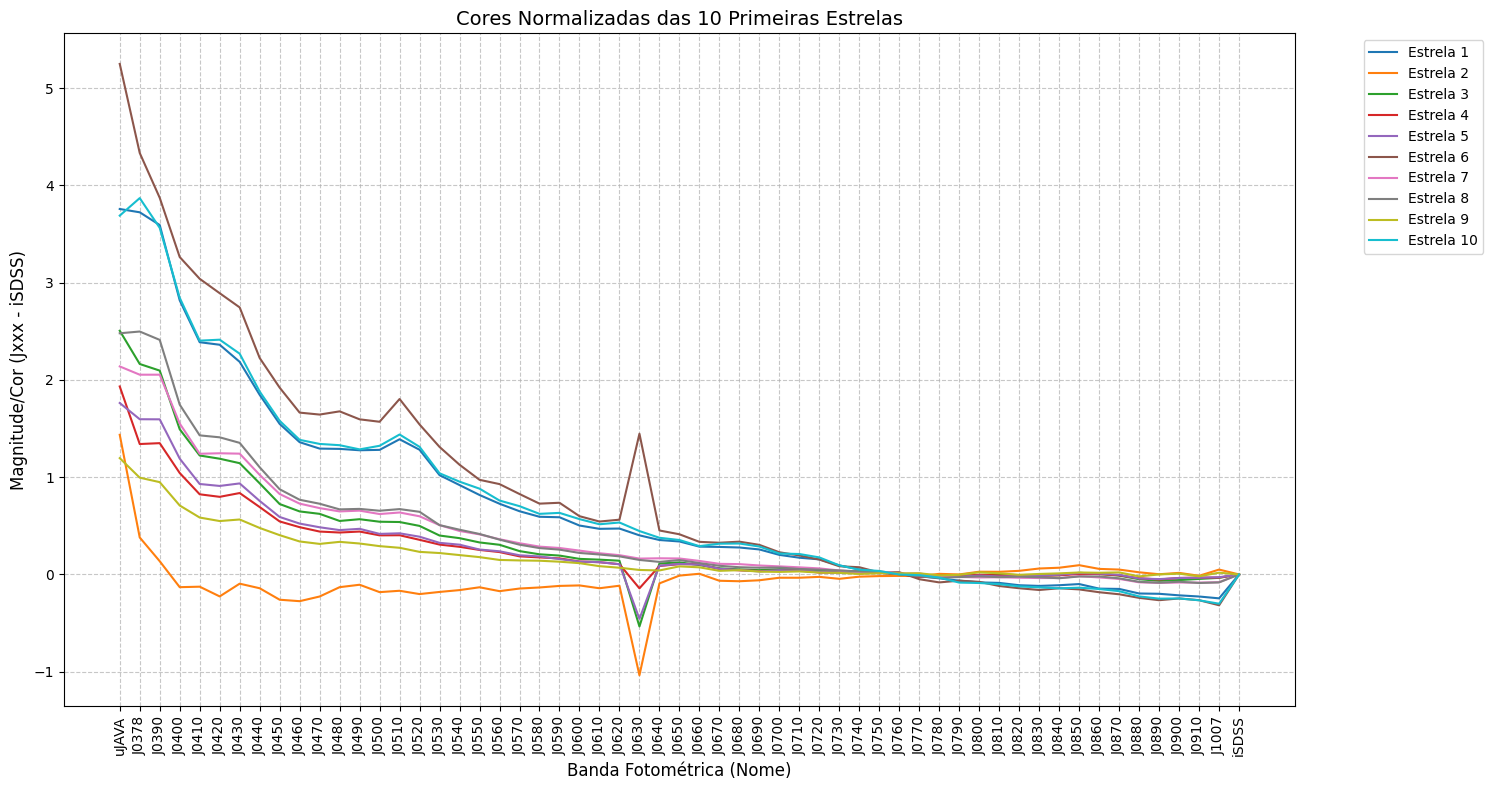

In [16]:
# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 primeiras estrelas
for i in range(10):
    plt.plot(filter_names, cores_normalizadas.iloc[i], label=f'Estrela {i+1}')

# Configurações do gráfico

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)', fontsize=12)
plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)', fontsize=12)
plt.title('Cores Normalizadas das 10 Primeiras Estrelas', fontsize=14)
plt.xticks(rotation=90) # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#### 7.5.  Plotar 10 Estrelas Aleatórias (Normalizadas)

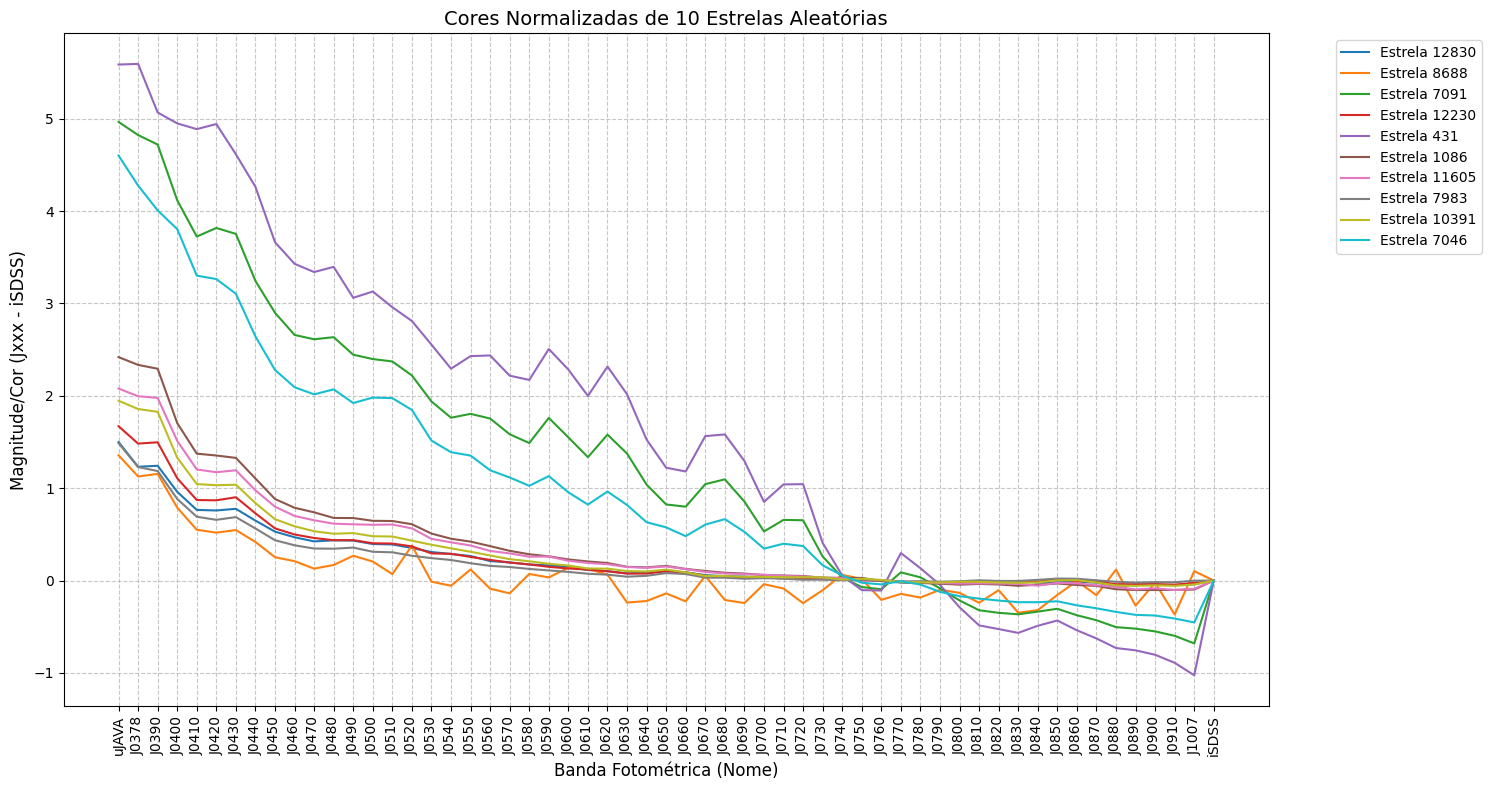

In [17]:
# Selecionar 10 estrelas aleatórias (com seed para reprodutibilidade)
np.random.seed(42)
indices_aleatorios = np.random.choice(len(df), 10, replace=False)
estrelas_aleatorias = cores_normalizadas.iloc[indices_aleatorios]

plt.figure(figsize=(15, 8))

# Plotar as estrelas aleatórias
for idx, row in estrelas_aleatorias.iterrows():
    plt.plot(filter_names, row, label=f'Estrela {idx}')

# Configurações do gráfico

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)', fontsize=12)
plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)', fontsize=12)
plt.title('Cores Normalizadas de 10 Estrelas Aleatórias', fontsize=14)
plt.xticks(rotation=90) # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
#plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#### 7.6.  Bandas com maior variação de cor

In [18]:
# Bandas com maior variação de cor
print("\nBandas com maior variação de cor:")
print(cores_normalizadas.std().sort_values(ascending=False).head(56))


Bandas com maior variação de cor:
uJAVA    1.499447
J0378    1.481042
J0390    1.391250
J0400    1.280781
J0420    1.276017
J0410    1.229675
J0430    1.206919
J0440    1.070757
J0450    0.956860
J0480    0.900474
J0460    0.884357
J0470    0.866819
J0500    0.825437
J0510    0.818613
J0490    0.816954
J0520    0.758479
J0530    0.662663
J0590    0.646354
J0550    0.633126
J0560    0.631868
J0540    0.608612
J0620    0.597839
J0600    0.571773
J0570    0.569208
J0580    0.534082
J0630    0.526652
J0610    0.505259
J0680    0.429909
J0640    0.406150
J0670    0.402749
J0690    0.350382
J0650    0.300528
J0660    0.293095
J1007    0.283979
J0710    0.268129
J0720    0.264634
J0910    0.228349
J0700    0.214687
J0880    0.212473
J0900    0.209039
J0860    0.208934
J0890    0.196301
J0810    0.188941
J0870    0.176730
J0820    0.162841
J0800    0.149458
J0830    0.148301
J0760    0.141268
J0850    0.137386
J0840    0.137384
J0790    0.124103
J0780    0.123671
J0730    0.120412
J0770    0.

### 8. Criando arquivo CSV dos dados normalizados

#### 8.1. Primeiras 10 estrelas

In [19]:
# filter_names - lista com os nomes das bandas fotométricas
# cores_normalizadas - DataFrame com os valores normalizados

# Criar o arquivo CSV
# Primeiro vamos preparar os dados para exportação
dados_exportacao = cores_normalizadas.head(10).copy()  # Pegando as 10 primeiras estrelas
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['Estrela'] = [f'Estrela {i+1}' for i in range(10)]  # Adicionando coluna de identificação

# Reorganizando as colunas para ter 'Estrela' primeiro
colunas = ['Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_estrelas.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso!')

Arquivo cores_normalizadas_estrelas.csv criado com sucesso!


### 8.2. 10 estrelas aleatórias

In [20]:
# 1. Selecionar 10 estrelas aleatórias (com seed para reprodutibilidade)
np.random.seed(42)
indices_aleatorios = np.random.choice(len(df), 10, replace=False)
estrelas_aleatorias = cores_normalizadas.iloc[indices_aleatorios]

# 2. Criar o arquivo CSV com os dados das estrelas aleatórias
# Preparar os dados para exportação
dados_exportacao = estrelas_aleatorias.copy()
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['ID_Estrela'] = indices_aleatorios  # Adicionando coluna com os IDs originais

# Reorganizando as colunas para ter 'ID_Estrela' primeiro
colunas = ['ID_Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_estrelas_aleatorias.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso!')

Arquivo cores_normalizadas_estrelas_aleatorias.csv criado com sucesso!


### 8.3. Todas as estrelas do conjunto de dados

In [21]:
# filter_names - lista com os nomes das bandas fotométricas
# cores_normalizadas - DataFrame com os valores normalizados

# Criar o arquivo CSV
# Preparar os dados para exportação (todas as estrelas)
dados_exportacao = cores_normalizadas.copy()  # Pegando todas as estrelas
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['Estrela'] = [f'Estrela {i+1}' for i in range(len(cores_normalizadas))]  # Coluna de identificação para todas

# Reorganizando as colunas para ter 'Estrela' primeiro
colunas = ['Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_todas_as_estrelas.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso! Contendo {len(cores_normalizadas)} estrelas.')

Arquivo cores_normalizadas_todas_as_estrelas.csv criado com sucesso! Contendo 17378 estrelas.


### 9. Rede SOM

*EM DESENVOLVIMENTO

In [22]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=1a8afdea60bd313658338f28e2f6e30b011d79836144459317d6b6506eca7b26
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import seaborn as sns

# Carregar os dados das estrelas já normalizados
# O arquivo 'cores_normalizadas_todas_as_estrelas.csv' foi criado anteriormente
# com as colunas sendo os nomes das bandas fotométricas e uma coluna 'Estrela'.
df = pd.read_csv('/content/cores_normalizadas_todas_as_estrelas.csv')

# Precisamos do filter_names para identificar as colunas de dados corretas
# Recarregamos o arquivo de filtros para garantir que filter_names está disponível e correto
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')
filter_names = df_filters['name'].tolist()

# Selecionar apenas as colunas que correspondem às bandas fotométricas
# As colunas no CSV exportado são os nomes das bandas listados em filter_names.
# A coluna 'Estrela' precisa ser excluída, pois não é um dado fotométrico para a SOM.
dados = df[filter_names].values

# Como os dados já estão normalizados, não precisamos aplicar MinMaxScaler
print("Dados carregados (já normalizados). Shape:", dados.shape)

Dados carregados (já normalizados). Shape: (17378, 57)


In [24]:
# Parâmetros da SOM
tamanho_x = 15  # Aumentei o tamanho para melhor resolução
tamanho_y = 15
dimensao_entrada = dados.shape[1]  # Número de características de entrada (agora correto)
iteracoes = 2000  # Aumentei as iterações para melhor convergência
taxa_aprendizado = 0.5

# Inicializar a SOM
print("\nInicializando a SOM...")
som = MiniSom(tamanho_x, tamanho_y, dimensao_entrada,
              sigma=1.5, learning_rate=taxa_aprendizado,
              neighborhood_function='gaussian', random_seed=42)


Inicializando a SOM...


In [25]:
# Inicialização dos pesos usando PCA para melhor desempenho
#som.pca_weights_init(dados)

# Treinar a SOM
print("Treinando a SOM...")
som.train_batch(dados, iteracoes, verbose=True)

Treinando a SOM...
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.4887551457425655


In [26]:
# Obter as coordenadas de cada estrela no mapa
coordenadas = np.array([som.winner(x) for x in dados])

In [27]:
# Criar um DataFrame com as coordenadas
df_coordenadas = pd.DataFrame(coordenadas, columns=['X', 'Y'])
df_resultado = pd.concat([df[['Estrela']], df_coordenadas], axis=1)

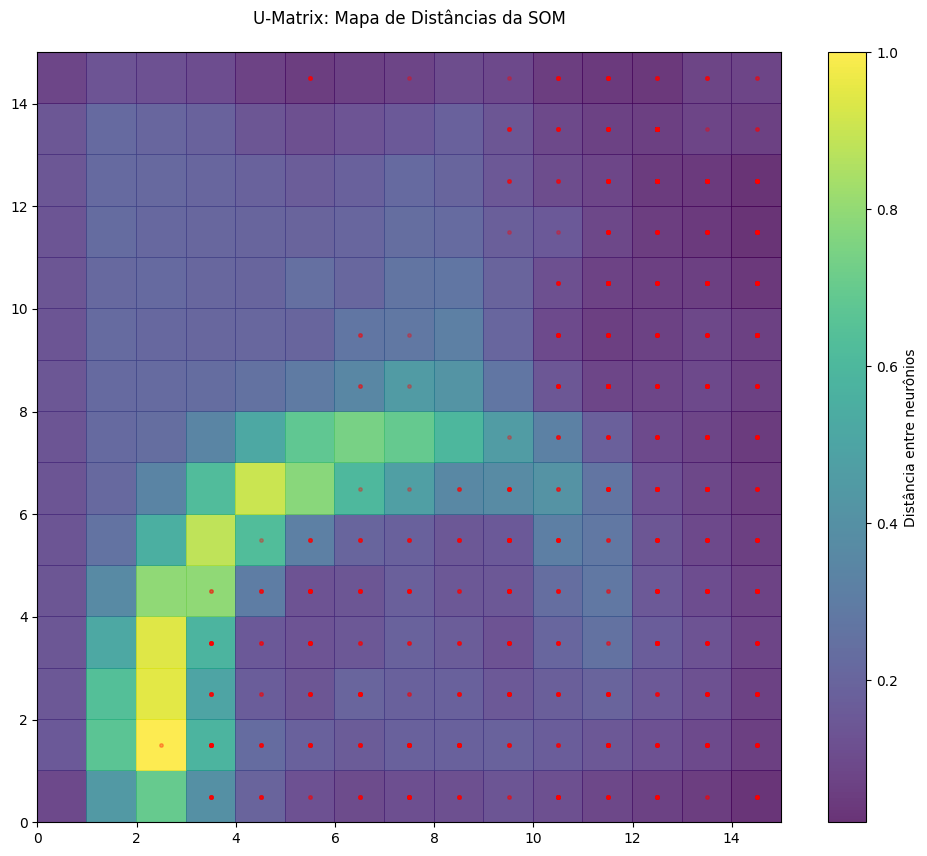

In [28]:
# 1. Visualização do mapa de distâncias (U-Matrix)
plt.figure(figsize=(12, 10))
plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix: Mapa de Distâncias da SOM', pad=20)

# Adicionar pontos para as estrelas (amostra aleatória para não sobrecarregar)
np.random.seed(42)
amostra = np.random.choice(len(dados), size=1000, replace=False)
for i in amostra:
    x, y = coordenadas[i]
    plt.plot(x+0.5, y+0.5, 'r.', markersize=5, alpha=0.3)

plt.show()

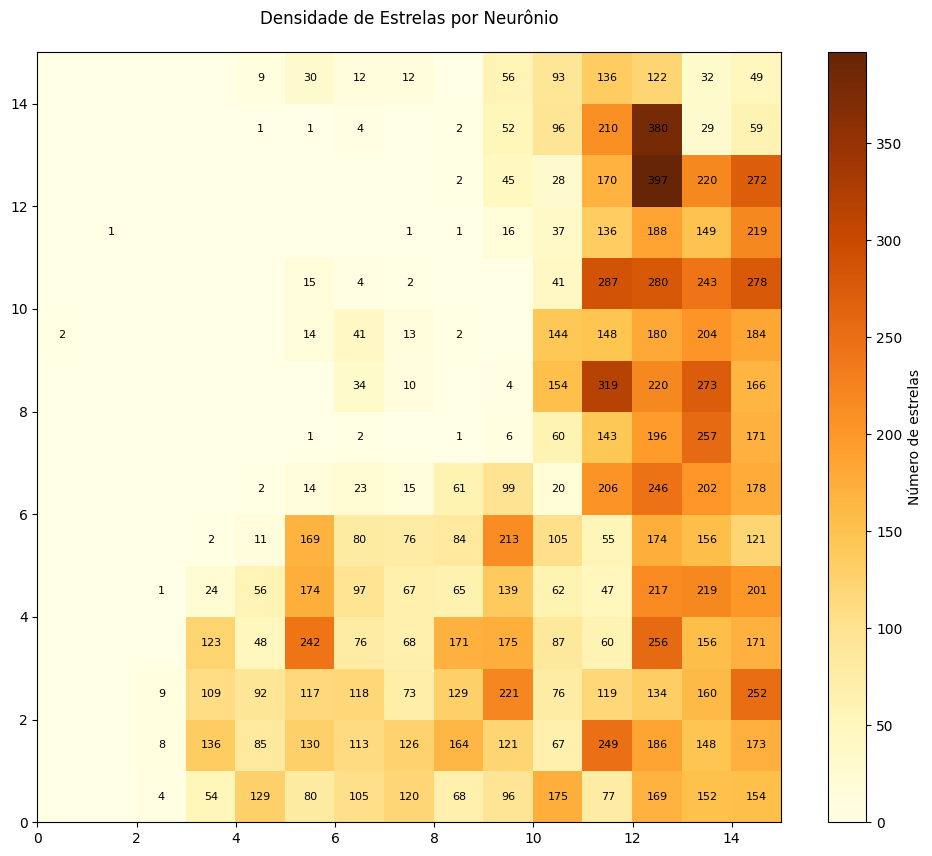

In [29]:
# 2. Visualização da densidade de estrelas por neurônio
plt.figure(figsize=(12, 10))
contagem = np.zeros((tamanho_x, tamanho_y))
for x, y in coordenadas:
    contagem[x][y] += 1

plt.pcolor(contagem.T, cmap='YlOrBr')
plt.colorbar(label='Número de estrelas')
plt.title('Densidade de Estrelas por Neurônio', pad=20)

# Adicionar os valores de contagem
for i in range(tamanho_x):
    for j in range(tamanho_y):
        if contagem[i,j] > 0:
            plt.text(i+0.5, j+0.5, f'{int(contagem[i,j])}',
                     ha='center', va='center', color='black', fontsize=8)

plt.show()


Agrupando neurônios por similaridade...


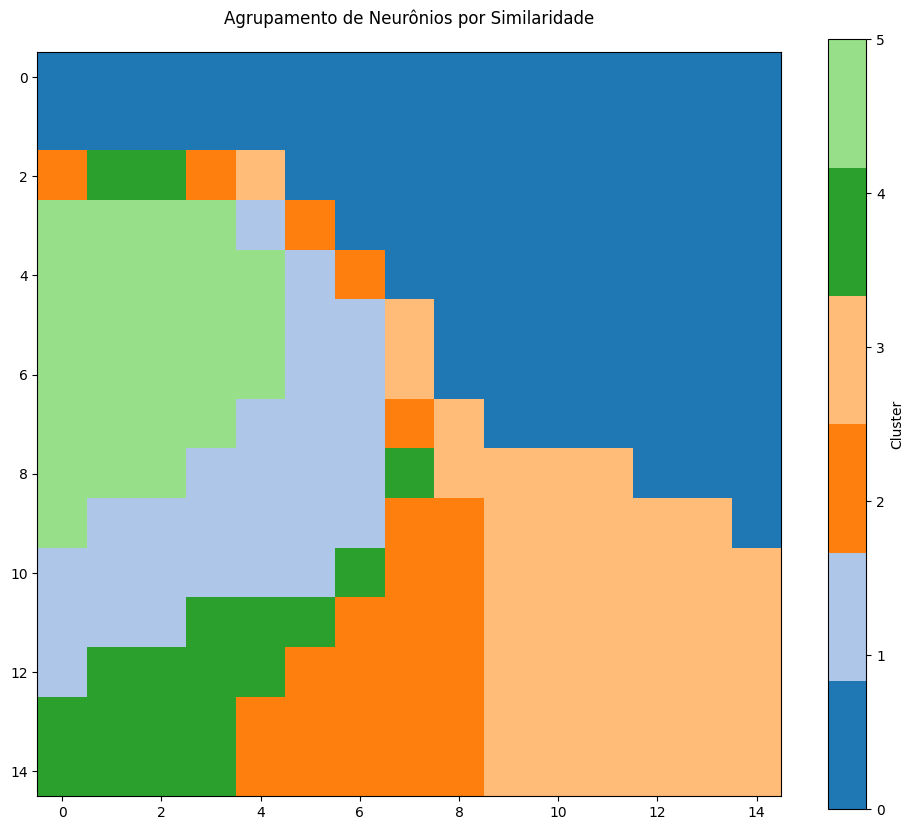

In [30]:
# 3. Agrupamento dos neurônios por similaridade
print("\nAgrupando neurônios por similaridade...")
n_clusters = 6  # Número de clusters
pesos = som.get_weights().reshape(-1, dimensao_entrada)
# Usar n_init para evitar warning do KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Adicionado n_init=10
kmeans.fit(pesos)

# Mapear cada neurônio para um cluster
clusters_neurônios = kmeans.labels_.reshape(tamanho_x, tamanho_y)

# Visualizar os clusters no mapa
plt.figure(figsize=(12, 10))
# Usar ListedColormap para garantir compatibilidade com versões mais recentes do matplotlib
cmap = ListedColormap([plt.cm.tab20(i) for i in range(n_clusters)])
plt.imshow(clusters_neurônios, cmap=cmap)
plt.colorbar(ticks=range(n_clusters), label='Cluster')
plt.title('Agrupamento de Neurônios por Similaridade', pad=20)
plt.show()

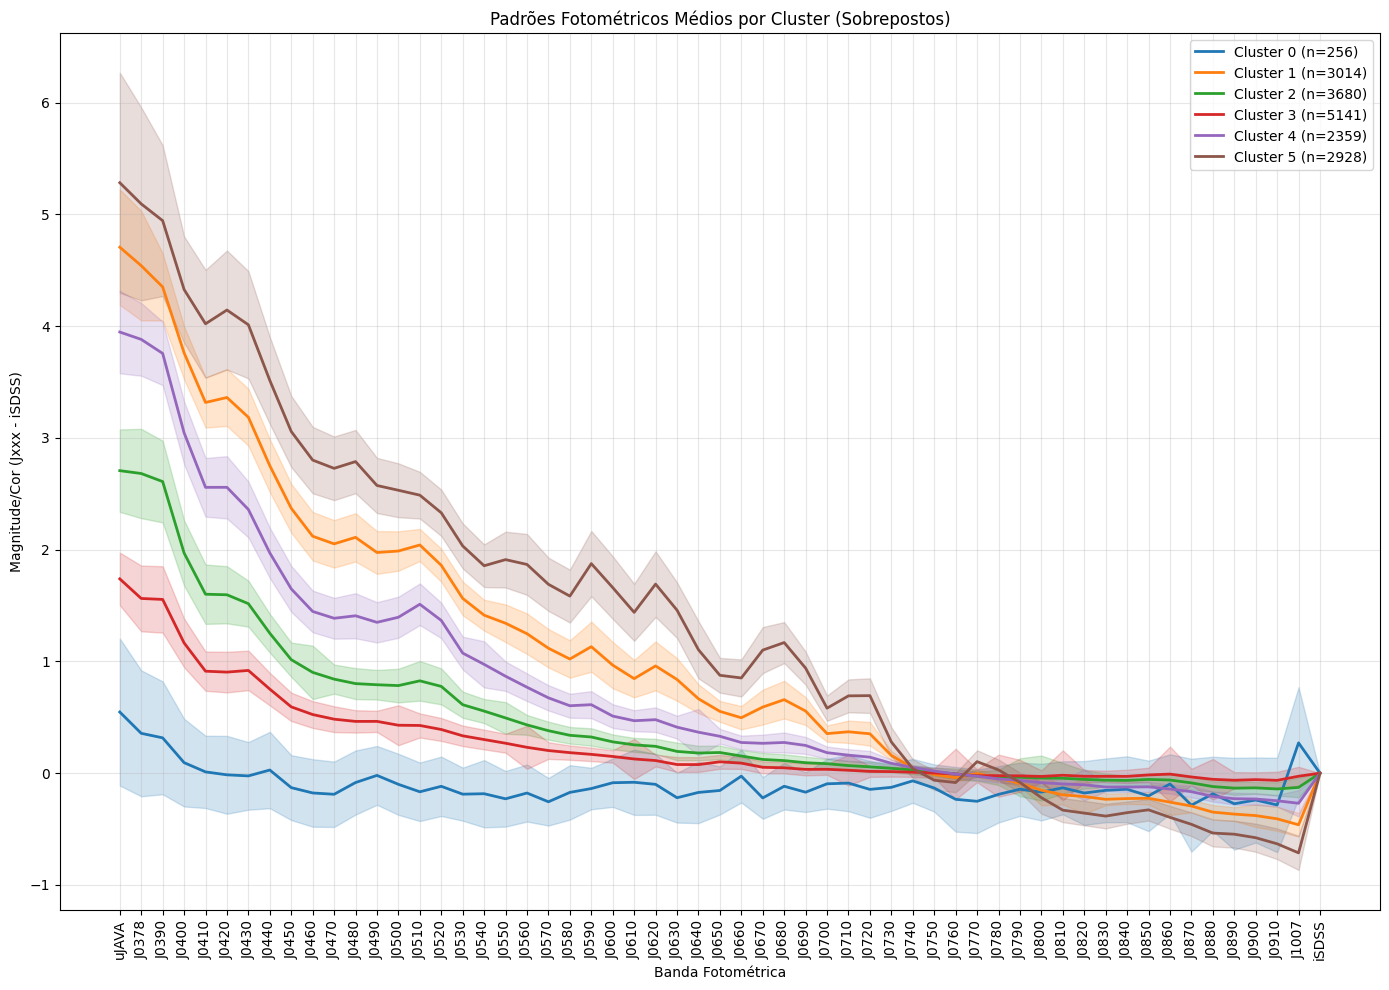

In [31]:
# Determinar o cluster de cada estrela
df_resultado['Cluster'] = [clusters_neurônios[x][y] for x, y in coordenadas]

# 4. Visualização das curvas médias por cluster (todas sobrepostas em um único gráfico)
plt.figure(figsize=(14, 10))

cores = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']  # Cores diferentes para cada cluster

for cluster in range(n_clusters):
    # Obter estrelas do cluster
    indices = df_resultado[df_resultado['Cluster'] == cluster].index
    dados_cluster = dados[indices]

    # Calcular média e desvio padrão
    media = np.mean(dados_cluster, axis=0)
    desvio = np.std(dados_cluster, axis=0)

    # Plotar todas as curvas no mesmo gráfico
    plt.plot(filter_names, media, color=cores[cluster],
             label=f'Cluster {cluster} (n={len(indices)})', linewidth=2)
    plt.fill_between(filter_names, media-desvio, media+desvio,
                    color=cores[cluster], alpha=0.2)

# Configurações do gráfico
plt.title('Padrões Fotométricos Médios por Cluster (Sobrepostos)')
plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)')
plt.xlabel('Banda Fotométrica')
plt.xticks(rotation=90)
plt.legend(loc='best', fontsize=10)  # Adiciona legenda com informações de cada cluster
plt.grid(True, alpha=0.3)  # Adiciona grade para melhor visualização

# Ajustar layout
plt.tight_layout()
plt.show()

Shape dos dados: (17378, 57)
Número de filtros em lambda_pivot: 57


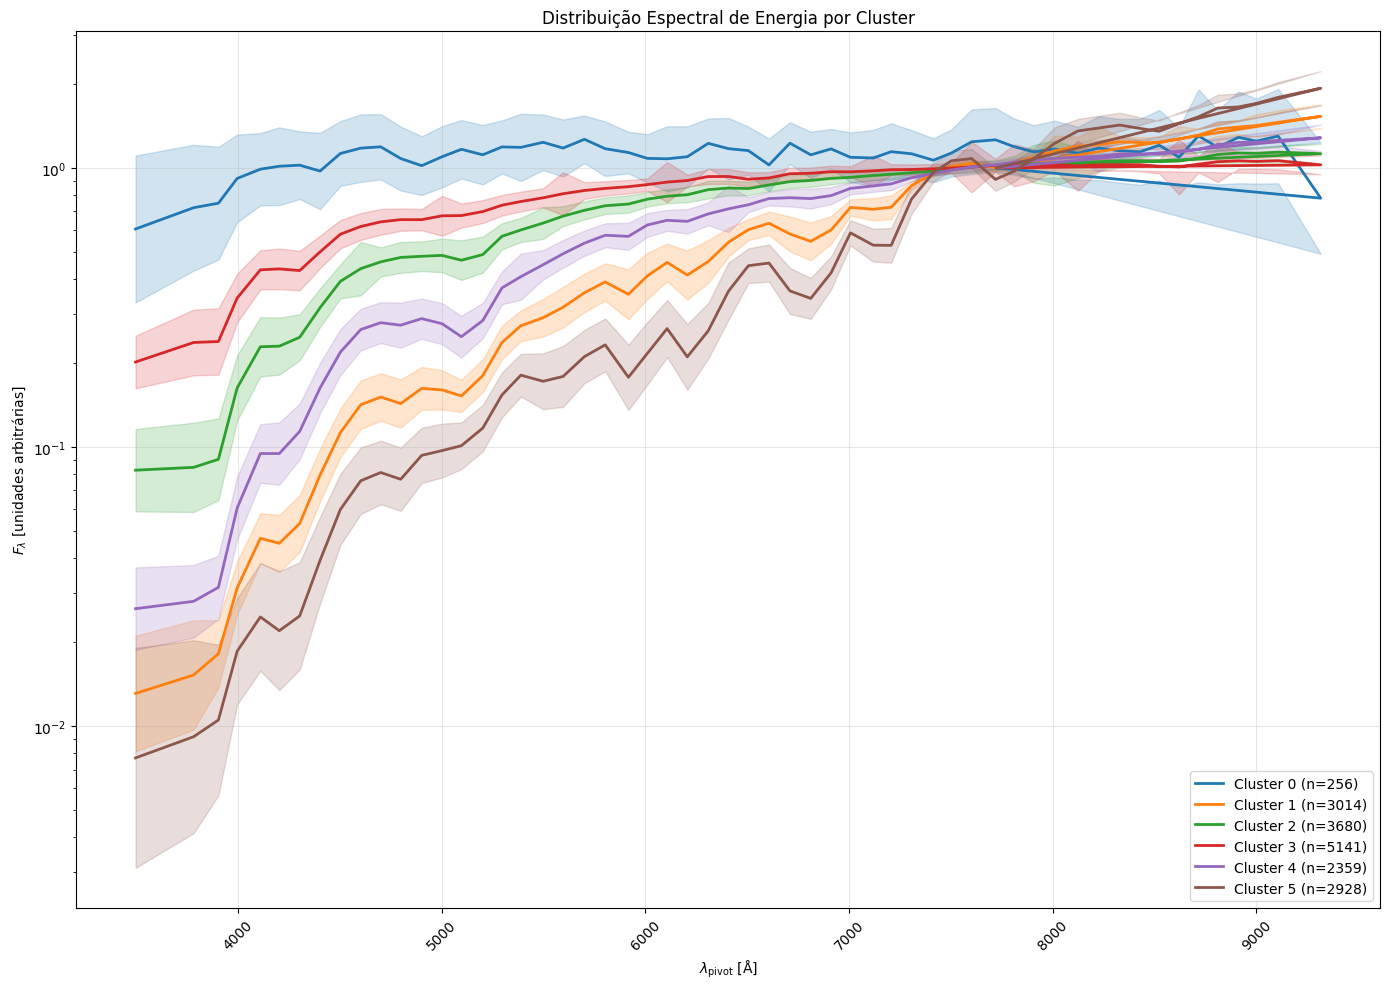

In [32]:
# Extrair os comprimentos de onda pivot
lambda_pivot = df_filters['wavelength'].values

# Verificar se as dimensões batem
print(f"Shape dos dados: {dados.shape}")
print(f"Número de filtros em lambda_pivot: {len(lambda_pivot)}")

# Determinar o cluster de cada estrela
df_resultado['Cluster'] = [clusters_neurônios[x][y] for x, y in coordenadas]

# 4. Visualização das curvas médias por cluster (todas sobrepostas em um único gráfico)
plt.figure(figsize=(14, 10))

cores = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']  # Cores diferentes para cada cluster

for cluster in range(n_clusters):
    # Obter estrelas do cluster
    indices = df_resultado[df_resultado['Cluster'] == cluster].index
    dados_cluster = dados[indices]

    # Calcular média e desvio padrão
    media_mag = np.mean(dados_cluster, axis=0)
    desvio_mag = np.std(dados_cluster, axis=0)

    # Converter magnitude para fluxo Fλ (em unidades arbitrárias)
    # Fλ = 10^(-0.4 * mag)
    media_flux = 10**(-0.4 * media_mag)

    # Calcular limites de incerteza para o fluxo
    flux_min = 10**(-0.4 * (media_mag + desvio_mag))
    flux_max = 10**(-0.4 * (media_mag - desvio_mag))

    # Plotar todas as curvas no mesmo gráfico
    plt.plot(lambda_pivot, media_flux, color=cores[cluster],
             label=f'Cluster {cluster} (n={len(indices)})', linewidth=2)
    plt.fill_between(lambda_pivot, flux_min, flux_max,
                    color=cores[cluster], alpha=0.2)

# Configurações do gráfico
plt.title('Distribuição Espectral de Energia por Cluster')
plt.ylabel(r'$F_{\lambda}$ [unidades arbitrárias]')
plt.xlabel(r'$\lambda_{\mathrm{pivot}}$ [Å]')
plt.xticks(rotation=45)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)

# Escala logarítmica no eixo y (comum para distribuições espectrais)
plt.yscale('log')

# Opcional: escala logarítmica no eixo x também
# plt.xscale('log')

# Melhorar a visualização dos ticks no eixo x
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.tight_layout()
plt.show()

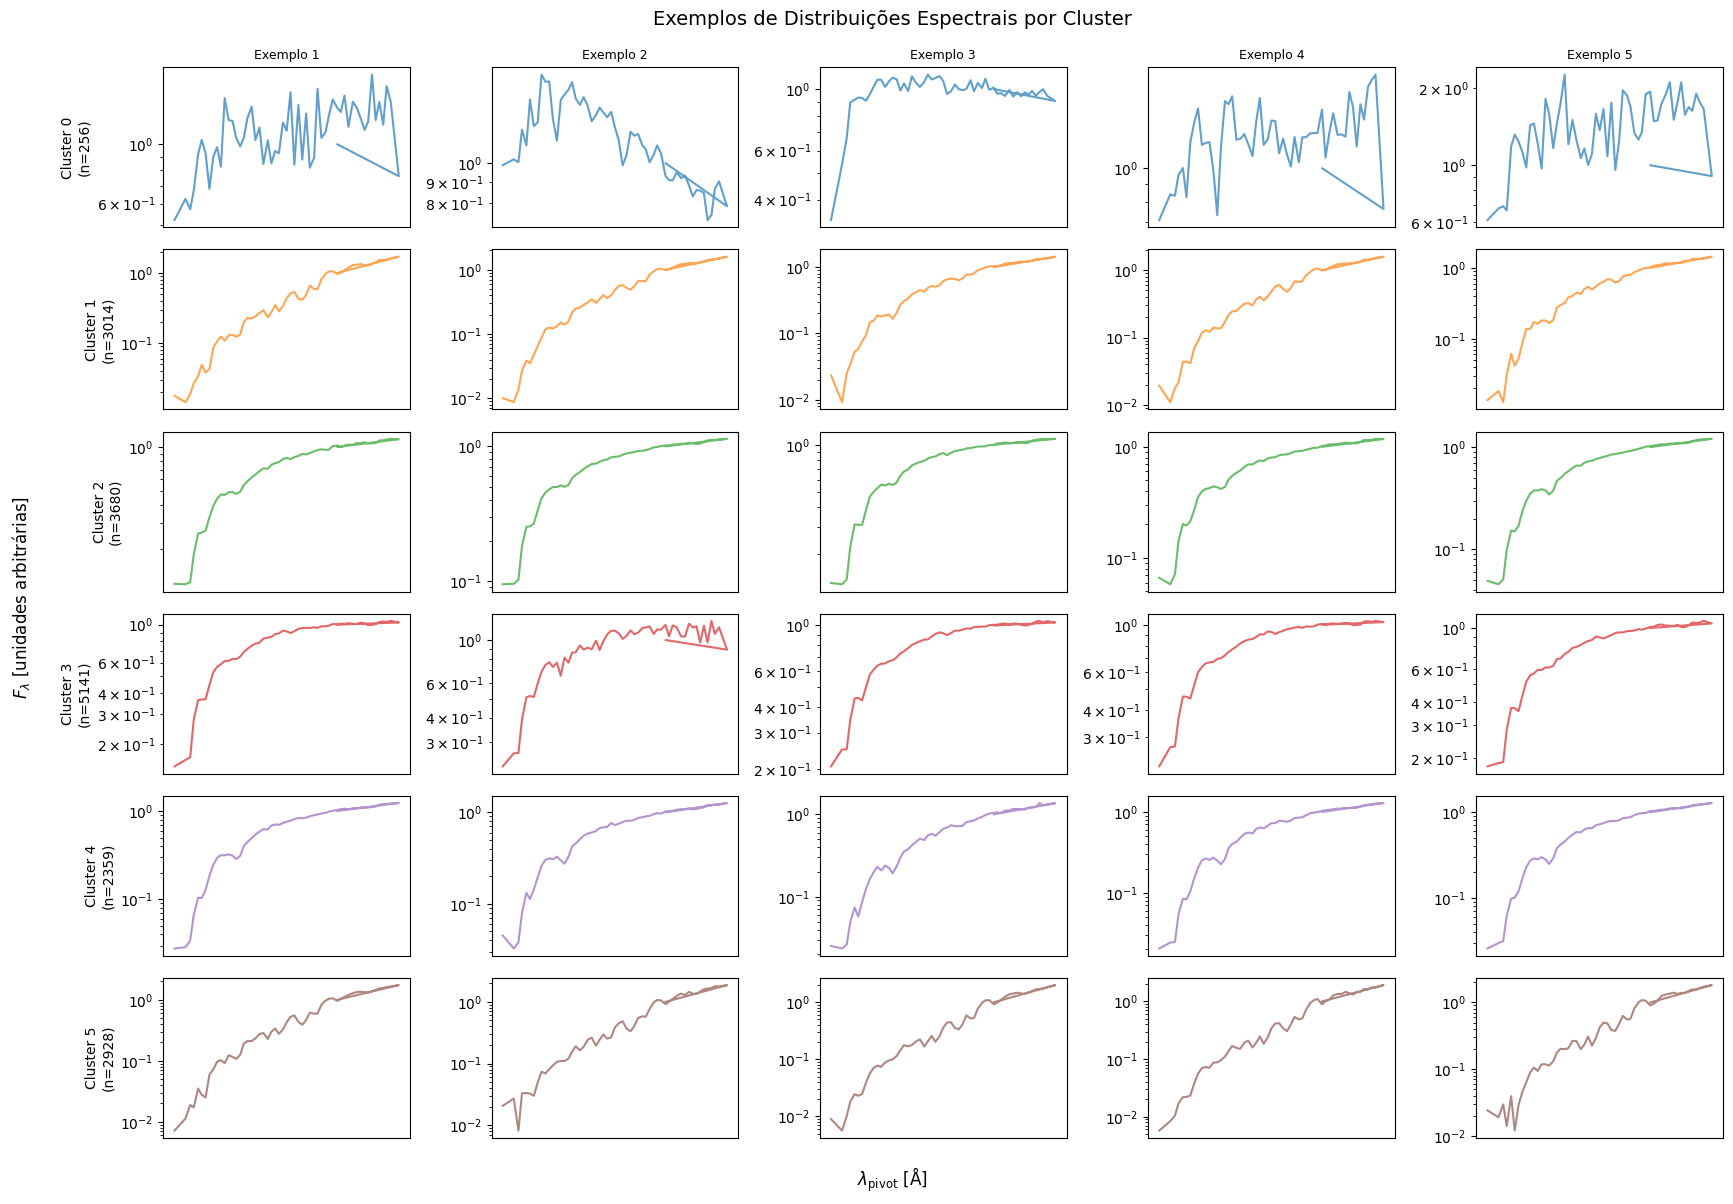

In [33]:
# 5. Visualização de exemplos aleatórios por cluster
plt.figure(figsize=(18, 12))
np.random.seed(42)

for cluster in range(n_clusters):
    # Selecionar 5 estrelas aleatórias do cluster
    indices = df_resultado[df_resultado['Cluster'] == cluster].index

    # Adicionado verificação para garantir que há estrelas no cluster antes de amostrar
    if len(indices) > 0:
        amostra = np.random.choice(indices, size=min(5, len(indices)), replace=False) # Amostra no máximo o número disponível

        for i, idx in enumerate(amostra):
            plt.subplot(n_clusters, 5, cluster*5 + i + 1)

            # Converter magnitude para fluxo Fλ
            fluxo_estrela = 10**(-0.4 * dados[idx])

            # Plotar com comprimentos de onda pivot no eixo x
            plt.plot(lambda_pivot, fluxo_estrela, color=f'C{cluster}', alpha=0.7, linewidth=1.5)

            # Configurações do subplot
            plt.xticks([]) # Remover rótulos do eixo X para subplots individuais
            plt.yticks([]) # Remover rótulos do eixo Y para subplots individuais

            # Escala logarítmica no eixo y
            plt.yscale('log')

            if i == 0:
                 plt.ylabel(f'Cluster {cluster}\n(n={len(indices)})', fontsize=10)

            # Adicionar título apenas no primeiro subplot de cada linha
            if cluster == 0:
                plt.title(f'Exemplo {i+1}', fontsize=9)

    else:
        print(f"Cluster {cluster} está vazio. Pulando visualização de exemplos.")

# Adicionar rótulos globais
plt.figtext(0.5, 0.01, r'$\lambda_{\mathrm{pivot}}$ [Å]', ha='center', fontsize=12)
plt.figtext(0.01, 0.5, r'$F_{\lambda}$ [unidades arbitrárias]', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])  # Ajustar para deixar espaço para os rótulos globais
plt.suptitle('Exemplos de Distribuições Espectrais por Cluster', y=0.99, fontsize=14)
plt.show()

/tmp/ipython-input-3003050918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_resultado, x='Cluster', palette='tab20')


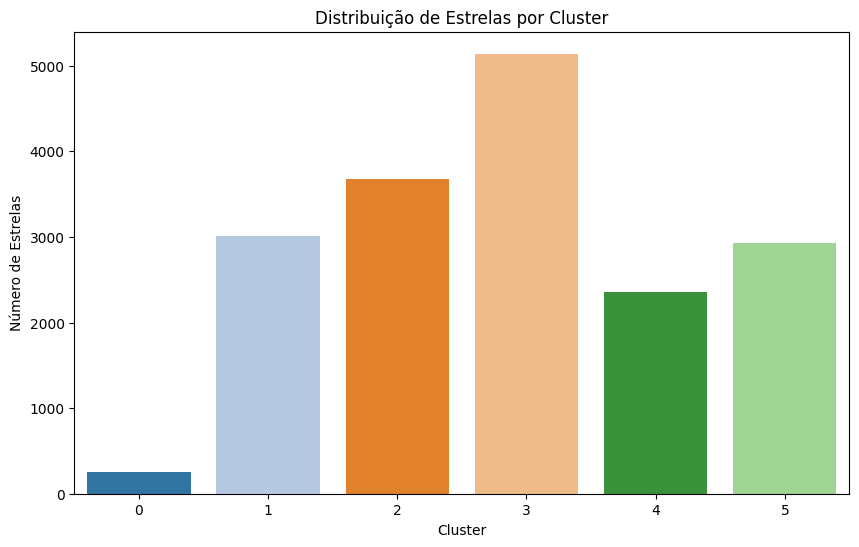

In [34]:
# 6. Visualização da distribuição dos clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resultado, x='Cluster', palette='tab20')
plt.title('Distribuição de Estrelas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Estrelas')
plt.show()

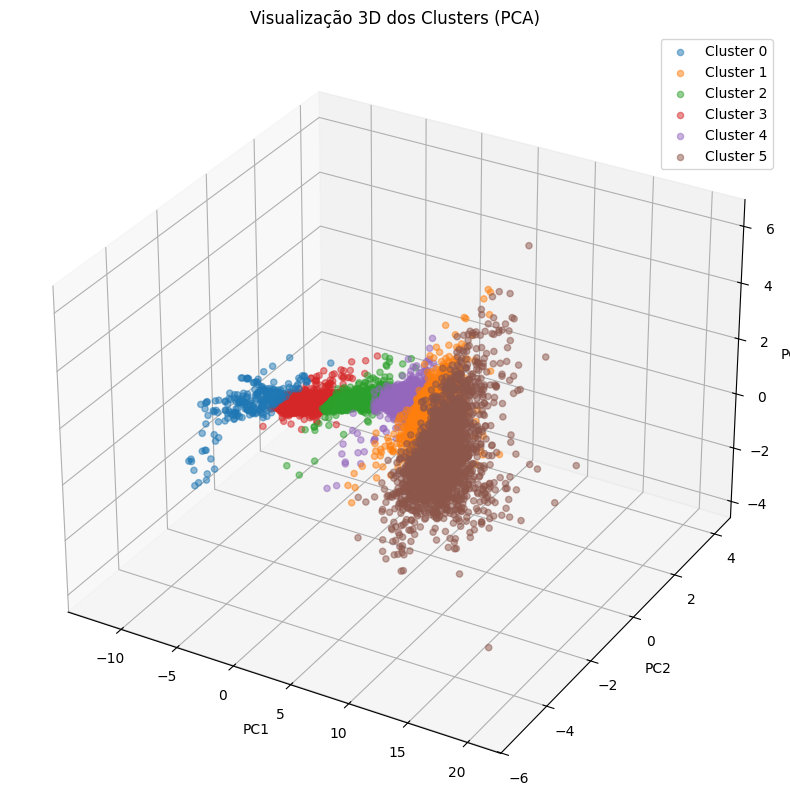

In [35]:
# 7. Visualização 3D
try:
    from mpl_toolkits.mplot3d import Axes3D

    # Redução dimensional para visualização (usando as 3 primeiras componentes principais)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    dados_3d = pca.fit_transform(dados)

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(n_clusters):
        indices = df_resultado[df_resultado['Cluster'] == cluster].index
        # Adicionado verificação para garantir que há estrelas no cluster antes de plotar
        if len(indices) > 0:
            ax.scatter(dados_3d[indices, 0], dados_3d[indices, 1], dados_3d[indices, 2],
                      label=f'Cluster {cluster}', alpha=0.5)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('Visualização 3D dos Clusters (PCA)')
    plt.legend()
    plt.show()
except ImportError:
    print("\nVisualização 3D não disponível (requer matplotlib 3D)")

In [36]:
# Salvar os resultados
df_resultado.to_csv('estrelas_clusterizadas_som.csv', index=False)
print("\nResultados salvos em 'estrelas_clusterizadas_som.csv'")

# Informações adicionais
print("\nResumo da análise:")
print(f"- Total de estrelas analisadas: {len(df_resultado)}")
print(f"- Tamanho do mapa SOM: {tamanho_x}x{tamanho_y} neurônios")
print(f"- Número de clusters identificados: {n_clusters}")
for cluster in range(n_clusters):
    n = sum(df_resultado['Cluster'] == cluster)
    print(f"  Cluster {cluster}: {n} estrelas ({n/len(df_resultado)*100:.1f}%)")


Resultados salvos em 'estrelas_clusterizadas_som.csv'

Resumo da análise:
- Total de estrelas analisadas: 17378
- Tamanho do mapa SOM: 15x15 neurônios
- Número de clusters identificados: 6
  Cluster 0: 256 estrelas (1.5%)
  Cluster 1: 3014 estrelas (17.3%)
  Cluster 2: 3680 estrelas (21.2%)
  Cluster 3: 5141 estrelas (29.6%)
  Cluster 4: 2359 estrelas (13.6%)
  Cluster 5: 2928 estrelas (16.8%)


### 9.1 Sanity Check e Filtragem de Qualidade dos Dados

Antes de prosseguir com a análise de clusters, é crucial verificar a qualidade dos dados fotométricos. Vamos realizar uma análise de valores ausentes, outliers e consistência interna.

#### 9.1.1 - Verificação de Valores Ausentes e Outliers

In [37]:
# 9.1.1 - Verificação de Valores Ausentes e Outliers

print("=== SANITY CHECK - QUALIDADE DOS DADOS ===")

# Verificar valores ausentes nas bandas fotométricas
valores_ausentes = df[filter_names].isnull().sum()
print("\nValores ausentes por banda:")
print(valores_ausentes[valores_ausentes > 0])

if valores_ausentes.sum() > 0:
    print(f"\nTotal de valores ausentes: {valores_ausentes.sum()}")
    # Opção: Remover estrelas com valores ausentes
    df_clean = df.dropna(subset=filter_names)
    print(f"Dataset após remoção de valores ausentes: {len(df_clean)} estrelas")
else:
    df_clean = df
    print("Nenhum valor ausente encontrado.")

=== SANITY CHECK - QUALIDADE DOS DADOS ===

Valores ausentes por banda:
Series([], dtype: int64)
Nenhum valor ausente encontrado.


#### 9.1.2 - Identificação de Outliers usando IQR

In [38]:
# 9.1.2 - Identificação de Outliers usando IQR

print("\n=== DETECÇÃO DE OUTLIERS ===")
outliers_por_banda = {}

for banda in filter_names:
    Q1 = df_clean[banda].quantile(0.25)
    Q3 = df_clean[banda].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[banda] < lim_inf) | (df_clean[banda] > lim_sup)]
    outliers_por_banda[banda] = len(outliers)

    if len(outliers) > 0:
        print(f"{banda}: {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.2f}%)")


=== DETECÇÃO DE OUTLIERS ===
uJAVA: 38 outliers (0.22%)
J0378: 31 outliers (0.18%)
J0390: 20 outliers (0.12%)
J0400: 6 outliers (0.03%)
J0410: 12 outliers (0.07%)
J0420: 13 outliers (0.07%)
J0430: 13 outliers (0.07%)
J0440: 6 outliers (0.03%)
J0450: 6 outliers (0.03%)
J0460: 6 outliers (0.03%)
J0470: 4 outliers (0.02%)
J0480: 2 outliers (0.01%)
J0490: 2 outliers (0.01%)
J0500: 4 outliers (0.02%)
J0510: 1 outliers (0.01%)
J0520: 2 outliers (0.01%)
J0530: 2 outliers (0.01%)
J0540: 4 outliers (0.02%)
J0550: 16 outliers (0.09%)
J0560: 31 outliers (0.18%)
J0570: 27 outliers (0.16%)
J0580: 40 outliers (0.23%)
J0590: 68 outliers (0.39%)
J0600: 139 outliers (0.80%)
J0610: 144 outliers (0.83%)
J0620: 154 outliers (0.89%)
J0630: 105 outliers (0.60%)
J0640: 71 outliers (0.41%)
J0650: 81 outliers (0.47%)
J0660: 231 outliers (1.33%)
J0670: 270 outliers (1.55%)
J0680: 65 outliers (0.37%)
J0690: 44 outliers (0.25%)
J0700: 80 outliers (0.46%)
J0710: 286 outliers (1.65%)
J0720: 470 outliers (2.70%)
J0

#### 9.1.3 - Filtragem Baseada em Qualidade

In [39]:
# 9.1.3 - Filtragem Baseada em Qualidade

# Remover estrelas com muitos outliers ou valores extremos
print("\nAplicando filtro de qualidade...")
limite_outliers = 10  # Máximo de 10% de outliers por estrela
estrelas_com_outliers = []

for idx, row in df_clean.iterrows():
    outliers_estrela = 0
    for banda in filter_names:
        Q1 = df_clean[banda].quantile(0.25)
        Q3 = df_clean[banda].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        if row[banda] < lim_inf or row[banda] > lim_sup:
            outliers_estrela += 1

    if outliers_estrela > len(filter_names) * 0.1:  # Mais de 10% das bandas são outliers
        estrelas_com_outliers.append(idx)

print(f"Estrelas com qualidade questionável: {len(estrelas_com_outliers)}")

# Dataset filtrado
df_filtrado = df_clean.drop(estrelas_com_outliers)
print(f"Dataset após filtragem: {len(df_filtrado)} estrelas ({len(df_filtrado)/len(df_clean)*100:.1f}% retidas)")

# Atualizar dados para análise SOM
dados_filtrados = df_filtrado[filter_names].values
print(f"Shape dos dados filtrados: {dados_filtrados.shape}")


Aplicando filtro de qualidade...
Estrelas com qualidade questionável: 507
Dataset após filtragem: 16871 estrelas (97.1% retidas)
Shape dos dados filtrados: (16871, 57)


### 9.2 Determinação do Número Ótimo de Clusters

Vamos utilizar métodos estatísticos para determinar o número ideal de clusters em vez de usar um valor fixo (6).

#### 9.2.1 - Método do Cotovelo (Elbow Method) e Silhueta

In [40]:
# 9.2.1 - Método do Cotovelo (Elbow Method) e Silhueta

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

print("\n=== DETERMINAÇÃO DO NÚMERO ÓTIMO DE CLUSTERS ===")

# Preparar os pesos da SOM para clustering
pesos_som = som.get_weights().reshape(-1, dados_filtrados.shape[1])

# Testar diferentes números de clusters
faixa_clusters = range(2, 15)
inertias = []
silhouette_scores = []

for k in faixa_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pesos_som)

    inertias.append(kmeans.inertia_)

    # Calcular score de silhueta (apenas se k > 1)
    if k > 1:
        sil_score = silhouette_score(pesos_som, cluster_labels)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(0)


=== DETERMINAÇÃO DO NÚMERO ÓTIMO DE CLUSTERS ===


#### 9.2.2 - Visualização dos Resultados

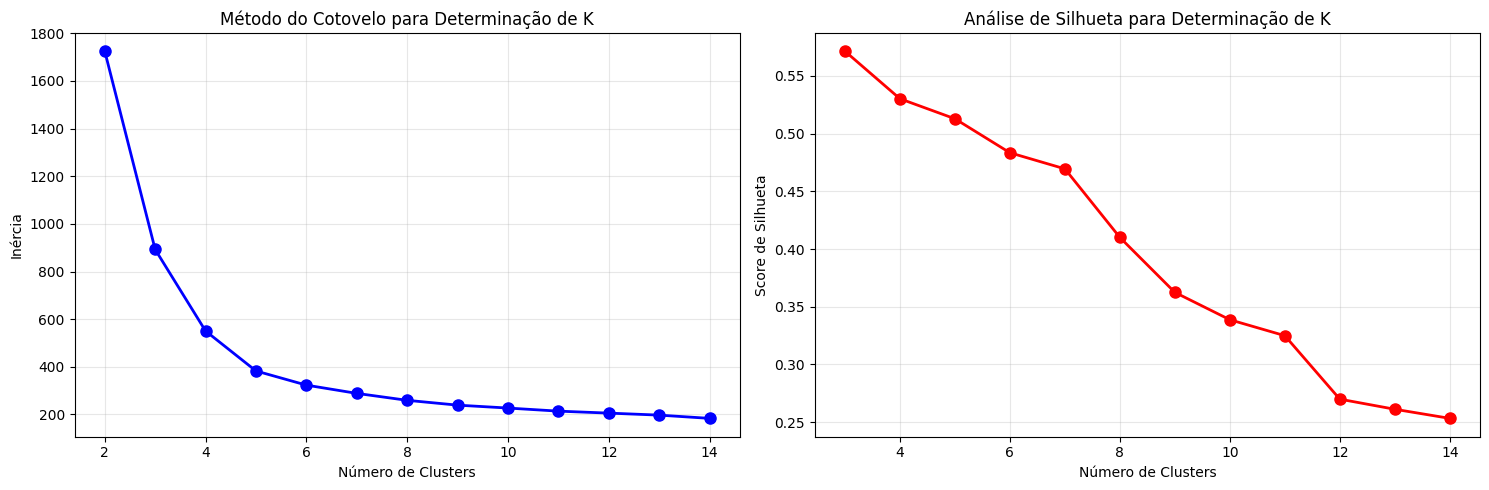

In [41]:
# 9.2.2 - Visualização dos Resultados

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Método do Cotovelo
ax1.plot(faixa_clusters, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Inércia')
ax1.set_title('Método do Cotovelo para Determinação de K')
ax1.grid(True, alpha=0.3)

# Plot Score de Silhueta
ax2.plot(faixa_clusters[1:], silhouette_scores[1:], 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de Clusters')
ax2.set_ylabel('Score de Silhueta')
ax2.set_title('Análise de Silhueta para Determinação de K')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 9.2.3 - Determinação Automática do Número Ótimo

In [42]:
# 9.2.3 - Determinação Automática do Número Ótimo

# Encontrar o ponto de inflexão no método do cotovelo
diferencas = np.diff(inertias)
diferencas_relativas = diferencas[1:] / diferencas[:-1]
k_elbow = np.argmin(diferencas_relativas) + 3  # +3 porque começamos em k=2

# Encontrar máximo score de silhueta
k_silhueta = faixa_clusters[np.argmax(silhouette_scores[1:]) + 1]

print(f"Número ótimo sugerido pelo método do cotovelo: k = {k_elbow}")
print(f"Número ótimo sugerido pela análise de silhueta: k = {k_silhueta}")

# Escolher o número ótimo

if np.max(silhouette_scores) > 0.6:  # Boa estrutura
    if abs(k_silhueta - k_elbow) <= 1:  # Métodos concordam
        n_clusters_otimo = k_silhueta
    else:
        n_clusters_otimo = calcular_score_hibrido()  # Desempate
else:  # Estrutura fraca
    n_clusters_otimo = min(k_elbow, k_silhueta)  # Prefere menos clusters

n_clusters_otimo = k_silhueta
print(f"Número ótimo de clusters selecionado: {n_clusters_otimo}")

Número ótimo sugerido pelo método do cotovelo: k = 5
Número ótimo sugerido pela análise de silhueta: k = 3
Número ótimo de clusters selecionado: 3


**Fluxo de decisão para escolher o número ótimo:**

1.   **Avalia qualidade geral**: Silhueta máxima indica quão "clusterizáveis" são os dados
2.  **Verifica consistência:** Se métodos discordam muito, algo pode estar errado
3.   **Desempate inteligente:** Usa método híbrido quando necessário
4.   **Fallback conservador:** Em dados ruins, prefere modelos mais simples

**Vantagem:** Adapta-se à qualidade intrínseca dos dados, evitando overfitting em estruturas fracas e aproveitando métodos avançados quando a estrutura é clara.

#### 9.2.4 - Aplicar Clustering com Número Ótimo

In [43]:
# 9.2.4 - Aplicar Clustering com Número Ótimo

kmeans_otimo = KMeans(n_clusters=n_clusters_otimo, random_state=42, n_init=10)
clusters_neurônios_otimo = kmeans_otimo.fit_predict(pesos_som).reshape(tamanho_x, tamanho_y)

print(f"Clustering otimizado aplicado com {n_clusters_otimo} clusters")

Clustering otimizado aplicado com 3 clusters


### 9.3 Análise do Sinal-Ruído (SNR) por Banda Fotométrica

Vamos calcular e visualizar a distribuição do SNR para cada banda fotométrica.

#### 9.3.1 - Cálculo do SNR para Todas as Estrelas e Bandas

In [44]:
# 9.3.1 - Cálculo do SNR para Todas as Estrelas e Bandas

print("\n=== ANÁLISE DO SINAL-RUÍDO (SNR) ===")

# Supondo que temos os erros fotométricos (precisa ser carregado do dataset original)
# Se não disponível, podemos estimar com base na dispersão dos dados

try:
    # Tentar carregar erros fotométricos do dataset original
    df_erros = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/...')  # Ajustar caminho
    print("Erros fotométricos carregados com sucesso")

except:
    # Estimativa alternativa: usar desvio padrão por banda como proxy do erro
    print("Erros fotométricos não encontrados. Estimando com base na variabilidade...")
    erros_estimados = df_filtrado[filter_names].std().values
    # Criar DataFrame de erros estimados (mesmo valor para todas as estrelas em cada banda)
    dados_erro = np.tile(erros_estimados, (len(df_filtrado), 1))
    df_erros = pd.DataFrame(dados_erro, columns=filter_names)

# Calcular fluxo a partir da magnitude
# F = 10^(-0.4 * mag)
fluxos = 10**(-0.4 * df_filtrado[filter_names].values)

# Calcular SNR = fluxo / erro_do_fluxo
# Para simplificar, vamos assumir que o erro no fluxo é proporcional ao erro na magnitude
snr_matrix = np.abs(fluxos / dados_erro)  # Usar valor absoluto


=== ANÁLISE DO SINAL-RUÍDO (SNR) ===
Erros fotométricos não encontrados. Estimando com base na variabilidade...


/tmp/ipython-input-3277658817.py:27: RuntimeWarning: divide by zero encountered in divide
  snr_matrix = np.abs(fluxos / dados_erro)  # Usar valor absoluto


#### 9.3.2 - Histogramas de SNR por Banda

Gerando histogramas de SNR por banda...


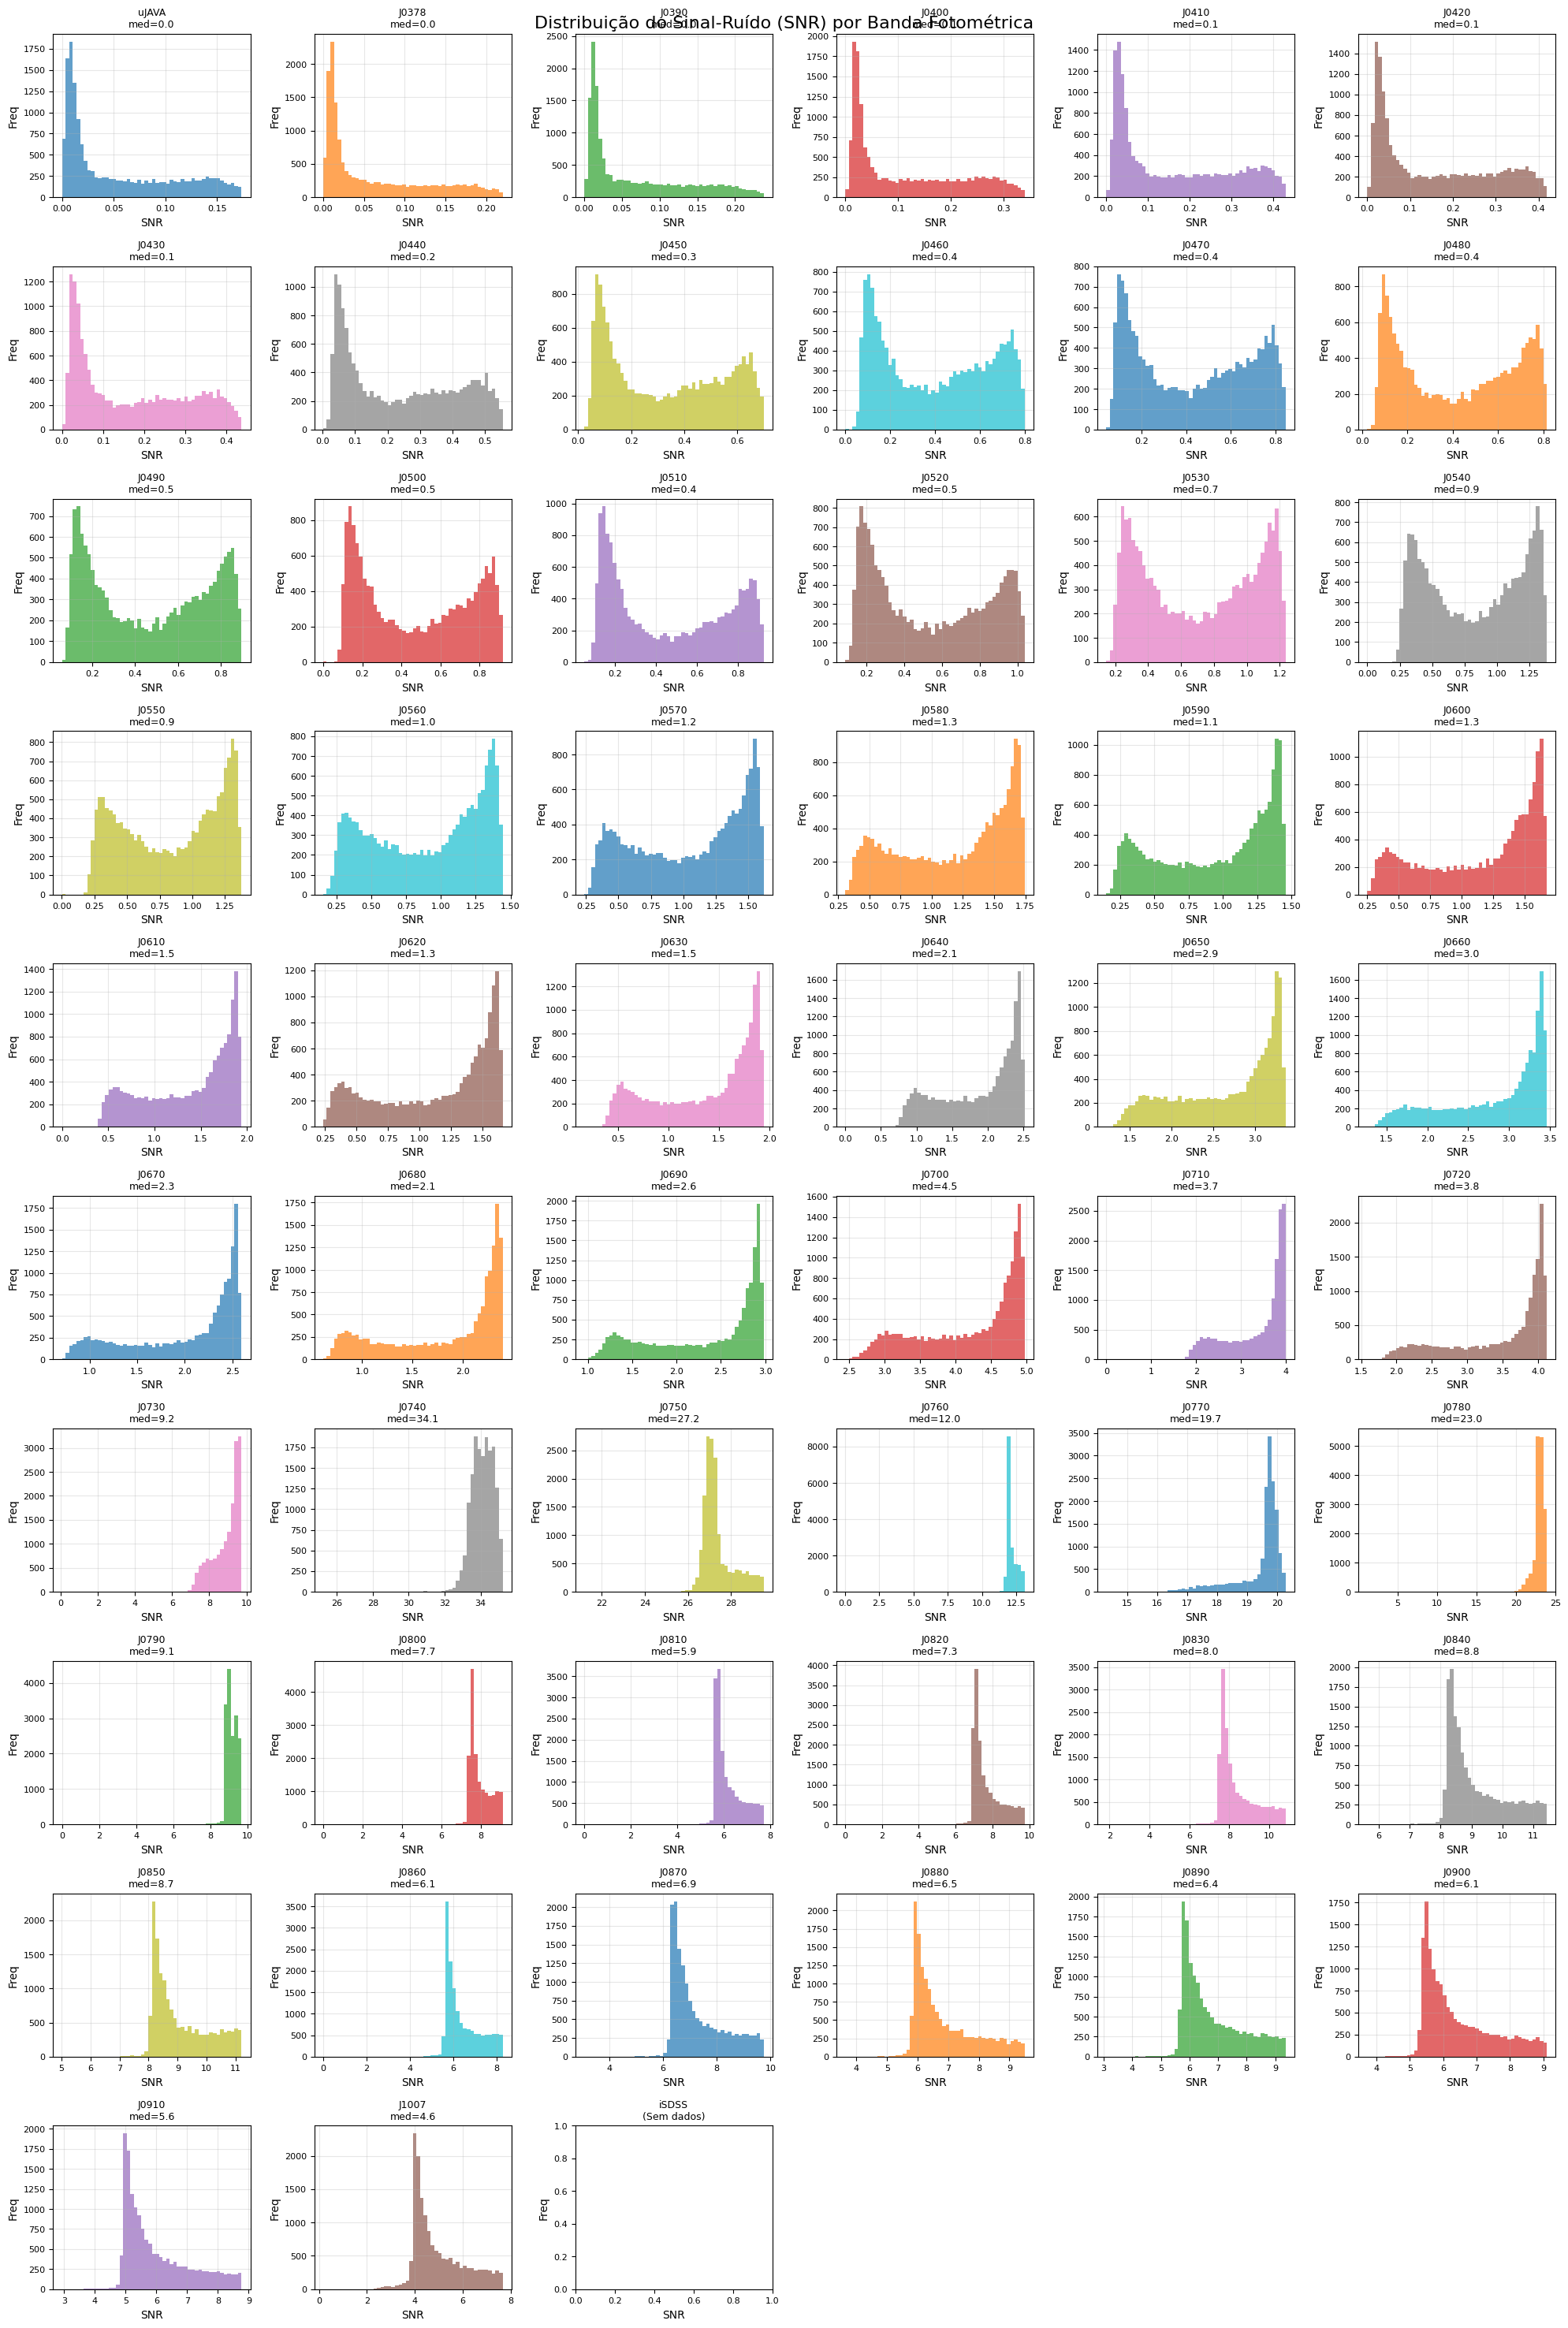

In [62]:
# 9.3.2 - Histogramas de SNR por Banda

print("Gerando histogramas de SNR por banda...")

# Calcular número de linhas e colunas para subplots
n_bandas = len(filter_names)
n_cols = 6
n_rows = (n_bandas + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
axes = axes.flatten()

# Estatísticas gerais de SNR
snr_global_stats = []

for i, banda in enumerate(filter_names):
    snr_banda = snr_matrix[:, i]
    snr_banda = snr_banda[np.isfinite(snr_banda)]  # Remover infinitos/NaNs

    # Only calculate percentile if there are values left
    if len(snr_banda) > 0:
        # Remove outliers extremes (top 5%) - only if there are enough data points
        if len(snr_banda) > 1: # Ensure there are at least 2 points to calculate percentile
            snr_banda = snr_banda[snr_banda < np.percentile(snr_banda, 95)]

        # Estatísticas por banda
        stats = {
            'banda': banda,
            'media': np.mean(snr_banda),
            'mediana': np.median(snr_banda),
            'std': np.std(snr_banda),
            'q10': np.percentile(snr_banda, 10) if len(snr_banda) > 0 else np.nan, # Handle empty array
            'q90': np.percentile(snr_banda, 90) if len(snr_banda) > 0 else np.nan  # Handle empty array
        }
        snr_global_stats.append(stats)

        # Plot histograma
        axes[i].hist(snr_banda, bins=50, alpha=0.7, color=f'C{i%10}')
        axes[i].set_title(f'{banda}\nmed={stats["mediana"]:.1f}', fontsize=9)
        axes[i].set_xlabel('SNR')
        axes[i].set_ylabel('Freq')
        axes[i].tick_params(axis='both', which='major', labelsize=8)
        axes[i].grid(True, alpha=0.3)
    else:
        # If no valid SNR values, add stats with NaN and skip plotting
        stats = {
            'banda': banda,
            'media': np.nan,
            'mediana': np.nan,
            'std': np.nan,
            'q10': np.nan,
            'q90': np.nan
        }
        snr_global_stats.append(stats)
        axes[i].set_title(f'{banda}\n(Sem dados)', fontsize=9)
        axes[i].set_xlabel('SNR')
        axes[i].set_ylabel('Freq')
        axes[i].tick_params(axis='both', which='major', labelsize=8)


# Ocultar eixos extras
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribuição do Sinal-Ruído (SNR) por Banda Fotométrica', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

##### 9.3.2.1 - Vizuaização de até 3 Histogramas de SNR por Banda

Gerando histogramas de SNR por banda...

Bandas disponíveis:
1. uJAVA
2. J0378
3. J0390
4. J0400
5. J0410
6. J0420
7. J0430
8. J0440
9. J0450
10. J0460
11. J0470
12. J0480
13. J0490
14. J0500
15. J0510
16. J0520
17. J0530
18. J0540
19. J0550
20. J0560
21. J0570
22. J0580
23. J0590
24. J0600
25. J0610
26. J0620
27. J0630
28. J0640
29. J0650
30. J0660
31. J0670
32. J0680
33. J0690
34. J0700
35. J0710
36. J0720
37. J0730
38. J0740
39. J0750
40. J0760
41. J0770
42. J0780
43. J0790
44. J0800
45. J0810
46. J0820
47. J0830
48. J0840
49. J0850
50. J0860
51. J0870
52. J0880
53. J0890
54. J0900
55. J0910
56. J1007

Escolha até 3 bandas (digite os números separados por vírgula)
Tempo limite: 5 minutos
Exemplo: 1,3,5
Sua escolha: 1,25,49
Bandas selecionadas: uJAVA, J0610, J0850


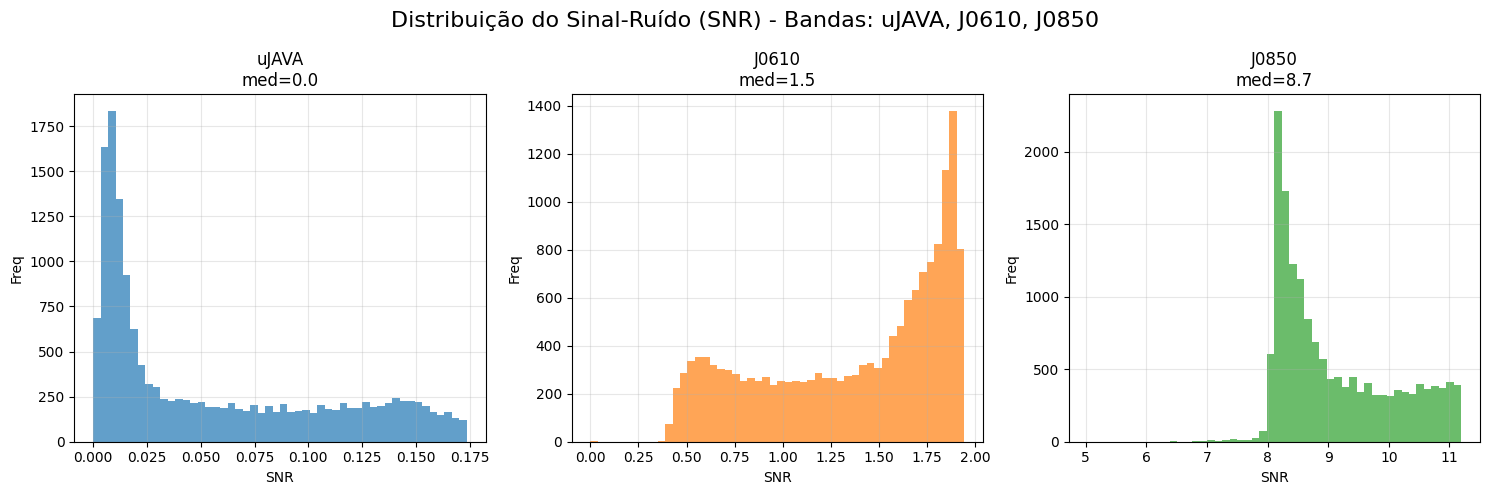


 Análise concluída para 3 banda(s): uJAVA, J0610, J0850


In [46]:
import time
import random

print("Gerando histogramas de SNR por banda...")

# Lista de bandas disponíveis (excluindo iSDSS)
bandas_disponiveis = [banda for banda in filter_names if banda != 'iSDSS']

print("\nBandas disponíveis:")
for i, banda in enumerate(bandas_disponiveis):
    print(f"{i+1}. {banda}")

print("\nEscolha até 3 bandas (digite os números separados por vírgula)")
print("Tempo limite: 5 minutos")
print("Exemplo: 1,3,5")

# Configurar timeout
start_time = time.time()
timeout = 300  # 5 minutos em segundos

bandas_escolhidas = []
try:
    while time.time() - start_time < timeout:
        if time.time() - start_time > 10:  # A cada 10 segundos, verifica o tempo
            remaining = timeout - (time.time() - start_time)
            print(f"Tempo restante: {int(remaining//60)}min {int(remaining%60)}s")

        user_input = input("Sua escolha: ")

        if user_input.strip():
            try:
                numeros = [int(x.strip()) for x in user_input.split(',')]
                numeros = [n for n in numeros if 1 <= n <= len(bandas_disponiveis)]

                if len(numeros) > 3:
                    print("Escolha no máximo 3 bandas. Usando as 3 primeiras.")
                    numeros = numeros[:3]

                if numeros:
                    bandas_escolhidas = [bandas_disponiveis[n-1] for n in numeros]
                    bandas_escolhidas = list(dict.fromkeys(bandas_escolhidas))  # Remove duplicatas
                    print(f"Bandas selecionadas: {', '.join(bandas_escolhidas)}")
                    break
                else:
                    print("Números inválidos. Tente novamente.")

            except ValueError:
                print("Entrada inválida. Use números separados por vírgula.")
        else:
            print("Aguardando entrada...")

except KeyboardInterrupt:
    print("\n Entrada interrompida pelo usuário.")

# Timeout ou nenhuma entrada - escolher 3 bandas aleatórias
if not bandas_escolhidas:
    bandas_escolhidas = random.sample(bandas_disponiveis, min(3, len(bandas_disponiveis)))
    print(f"Tempo esgotado! Bandas escolhidas aleatoriamente: {', '.join(bandas_escolhidas)}")

# Calcular número de linhas e colunas para subplots
n_bandas = len(bandas_escolhidas)
n_cols = 3  # Máximo 3 colunas para até 3 bandas
n_rows = (n_bandas + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_bandas == 1:
    axes = [axes]  # Garantir que axes seja uma lista mesmo com 1 subplot
else:
    axes = axes.flatten()

# Estatísticas gerais de SNR
snr_global_stats = []

for i, banda in enumerate(bandas_escolhidas):
    # Encontrar o índice original da banda na lista completa
    original_idx = filter_names.index(banda)
    snr_banda = snr_matrix[:, original_idx]
    snr_banda = snr_banda[np.isfinite(snr_banda)]  # Remover infinitos/NaNs

    # Only calculate percentile if there are values left
    if len(snr_banda) > 0:
        # Remove outliers extremes (top 5%) - only if there are enough data points
        if len(snr_banda) > 1: # Ensure there are at least 2 points to calculate percentile
            snr_banda = snr_banda[snr_banda < np.percentile(snr_banda, 95)]

        # Estatísticas por banda
        stats = {
            'banda': banda,
            'media': np.mean(snr_banda),
            'mediana': np.median(snr_banda),
            'std': np.std(snr_banda),
            'q10': np.percentile(snr_banda, 10) if len(snr_banda) > 0 else np.nan,
            'q90': np.percentile(snr_banda, 90) if len(snr_banda) > 0 else np.nan
        }
        snr_global_stats.append(stats)

        # Plot histograma
        axes[i].hist(snr_banda, bins=50, alpha=0.7, color=f'C{i%10}')
        axes[i].set_title(f'{banda}\nmed={stats["mediana"]:.1f}', fontsize=12)
        axes[i].set_xlabel('SNR')
        axes[i].set_ylabel('Freq')
        axes[i].tick_params(axis='both', which='major', labelsize=10)
        axes[i].grid(True, alpha=0.3)
    else:
        # If no valid SNR values, add stats with NaN and skip plotting
        stats = {
            'banda': banda,
            'media': np.nan,
            'mediana': np.nan,
            'std': np.nan,
            'q10': np.nan,
            'q90': np.nan
        }
        snr_global_stats.append(stats)
        axes[i].set_title(f'{banda}\n(Sem dados)', fontsize=12)
        axes[i].set_xlabel('SNR')
        axes[i].set_ylabel('Freq')
        axes[i].tick_params(axis='both', which='major', labelsize=10)

# Ocultar eixos extras
for j in range(len(bandas_escolhidas), len(axes)):
    axes[j].set_visible(False)

plt.suptitle(f'Distribuição do Sinal-Ruído (SNR) - Bandas: {", ".join(bandas_escolhidas)}', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

print(f"\n Análise concluída para {len(bandas_escolhidas)} banda(s): {', '.join(bandas_escolhidas)}")

#### 9.3.3 - Sumário Estatístico do SNR

In [47]:
# 9.3.3 - Sumário Estatístico do SNR

df_snr_stats = pd.DataFrame(snr_global_stats)
print("\n=== ESTATÍSTICAS GERAIS DO SNR ===")
print(f"SNR Médio Global: {df_snr_stats['media'].mean():.2f} ± {df_snr_stats['media'].std():.2f}")
print(f"SNR Mediano Global: {df_snr_stats['mediana'].median():.2f}")

# Identificar bandas com melhor e pior SNR
melhor_snr = df_snr_stats.loc[df_snr_stats['mediana'].idxmax()]
pior_snr = df_snr_stats.loc[df_snr_stats['mediana'].idxmin()]

print(f"\nBanda com MELHOR SNR: {melhor_snr['banda']} (mediana = {melhor_snr['mediana']:.1f})")
print(f"Banda com PIOR SNR: {pior_snr['banda']} (mediana = {pior_snr['mediana']:.1f})")


=== ESTATÍSTICAS GERAIS DO SNR ===
SNR Médio Global: 3.51 ± 4.89
SNR Mediano Global: 1.52

Banda com MELHOR SNR: J0850 (mediana = 8.7)
Banda com PIOR SNR: uJAVA (mediana = 0.0)


#### 9.3.4 - Recomendações Baseadas no SNR

In [48]:
# 9.3.4 - Recomendações Baseadas no SNR

print("\n=== RECOMENDAÇÕES BASEADAS NO SNR ===")
bandas_baixo_snr = df_snr_stats[df_snr_stats['mediana'] < 5]
if len(bandas_baixo_snr) > 0:
    print(f"Bandas com SNR potencialmente problemático (<5): {len(bandas_baixo_snr)}")
    print("Considerar:")
    print("- Excluir estas bandas de análises sensíveis")
    print("- Aplicar filtros de qualidade mais rigorosos")
    print("- Verificar calibração fotométrica")
else:
    print("Todas as bandas apresentam SNR adequado (>5)")

# Salvar resultados do SNR
df_snr_stats.to_csv('analise_snr_bandas.csv', index=False)
print("\nAnálise de SNR salva em 'analise_snr_bandas.csv'")


=== RECOMENDAÇÕES BASEADAS NO SNR ===
Bandas com SNR potencialmente problemático (<5): 2
Considerar:
- Excluir estas bandas de análises sensíveis
- Aplicar filtros de qualidade mais rigorosos
- Verificar calibração fotométrica

Análise de SNR salva em 'analise_snr_bandas.csv'


### 9.4 Integração dos Resultados com a Análise SOM Original

#### 9.4.1 - Aplicar Clustering Otimizado aos Dados Filtrados

In [49]:
# 9.4.1 - Aplicar Clustering Otimizado aos Dados Filtrados

print("\n=== APLICANDO CLUSTERING OTIMIZADO ===")

# Re-treinar SOM com dados filtrados (opcional)
if len(df_filtrado) != len(df):
    print("Retreinando SOM com dados filtrados...")
    som_filtrado = MiniSom(tamanho_x, tamanho_y, dados_filtrados.shape[1],
                          sigma=1.5, learning_rate=0.5,
                          neighborhood_function='gaussian', random_seed=42)
    som_filtrado.train_batch(dados_filtrados, 2000, verbose=True)

    # Obter coordenadas no mapa
    coordenadas_filtradas = np.array([som_filtrado.winner(x) for x in dados_filtrados])
    pesos_filtrados = som_filtrado.get_weights().reshape(-1, dados_filtrados.shape[1])
else:
    coordenadas_filtradas = coordenadas
    pesos_filtrados = pesos

# Aplicar K-means com número ótimo
kmeans_final = KMeans(n_clusters=n_clusters_otimo, random_state=42, n_init=10)
clusters_finais = kmeans_final.fit_predict(pesos_filtrados).reshape(tamanho_x, tamanho_y)

# Atribuir clusters às estrelas
df_resultado_filtrado = pd.DataFrame({
    'Estrela': df_filtrado['Estrela'].values if 'Estrela' in df_filtrado.columns else range(len(df_filtrado)),
    'X': coordenadas_filtradas[:, 0],
    'Y': coordenadas_filtradas[:, 1],
    'Cluster': [clusters_finais[x][y] for x, y in coordenadas_filtradas]
})

print(f"Análise finalizada com {n_clusters_otimo} clusters otimizados")
print(f"Distribuição dos clusters:")
print(df_resultado_filtrado['Cluster'].value_counts().sort_index())


=== APLICANDO CLUSTERING OTIMIZADO ===
Retreinando SOM com dados filtrados...
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.4254622909654969
Análise finalizada com 3 clusters otimizados
Distribuição dos clusters:
Cluster
0    9063
1    6781
2    1027
Name: count, dtype: int64


#### 9.4.2 - Salvar Resultados Finais

In [50]:
# 9.4.2 - Salvar Resultados Finais

df_resultado_filtrado.to_csv('estrelas_clusterizadas_som_otimizado.csv', index=False)
print("\nResultados otimizados salvos em 'estrelas_clusterizadas_som_otimizado.csv'")


Resultados otimizados salvos em 'estrelas_clusterizadas_som_otimizado.csv'


# ATÉ AQUI!

Restante são testes

### 10. Rede SOM - Análise

*EM DESENVOLVIMENTO

Análise e Melhorias para a Rede SOM

### 10.1 Análise do Erro de Quantização

Para entender melhor o treinamento da SOM, vamos modificar o código para:
- Registrar o erro de quantização durante o treinamento
- Plotar a curva de aprendizado
- Testar diferentes configurações de hiperparâmetros


Initializando a SOM...

Treinando a SOM e registrando erros...


  1%|▏         | 27/2000 [00:04<06:55,  4.75it/s]/usr/local/lib/python3.12/dist-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
100%|██████████| 2000/2000 [05:00<00:00,  6.66it/s]


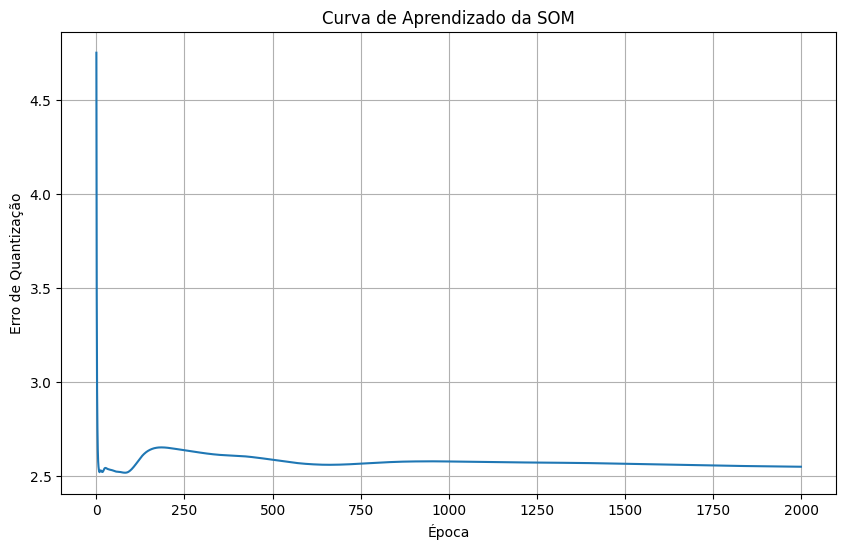


Erro de quantização final: 2.5498


In [51]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Função para treinar a SOM e registrar o erro
def train_som_with_tracking(som, data, num_epochs):
    quantization_errors = []
    for epoch in tqdm(range(num_epochs)):
        som.train_batch(data, 1, verbose=False)  # Treina 1 época
        q_error = som.quantization_error(data)
        quantization_errors.append(q_error)
    return quantization_errors

# Parâmetros da SOM
tamanho_x = 15
tamanho_y = 15
dimensao_entrada = dados.shape[1]
iteracoes = 2000
taxa_aprendizado = 0.5

# Inicializar a SOM
print("\nInitializando a SOM...")
som = MiniSom(tamanho_x, tamanho_y, dimensao_entrada,
              sigma=1.5, learning_rate=taxa_aprendizado,
              neighborhood_function='gaussian', random_seed=42)

# Treinar a SOM e registrar erros
print("\nTreinando a SOM e registrando erros...")
quantization_errors = train_som_with_tracking(som, dados, iteracoes)

# Plotar curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(quantization_errors)
plt.title('Curva de Aprendizado da SOM')
plt.xlabel('Época')
plt.ylabel('Erro de Quantização')
plt.grid(True)
plt.show()

# Mostrar erro final
print(f"\nErro de quantização final: {quantization_errors[-1]:.4f}")

### 10.2 Análise da U-Matrix e Densidade de Estrelas

Vamos melhorar a visualização para entender melhor a relação entre a U-Matrix e a distribuição dos dados:

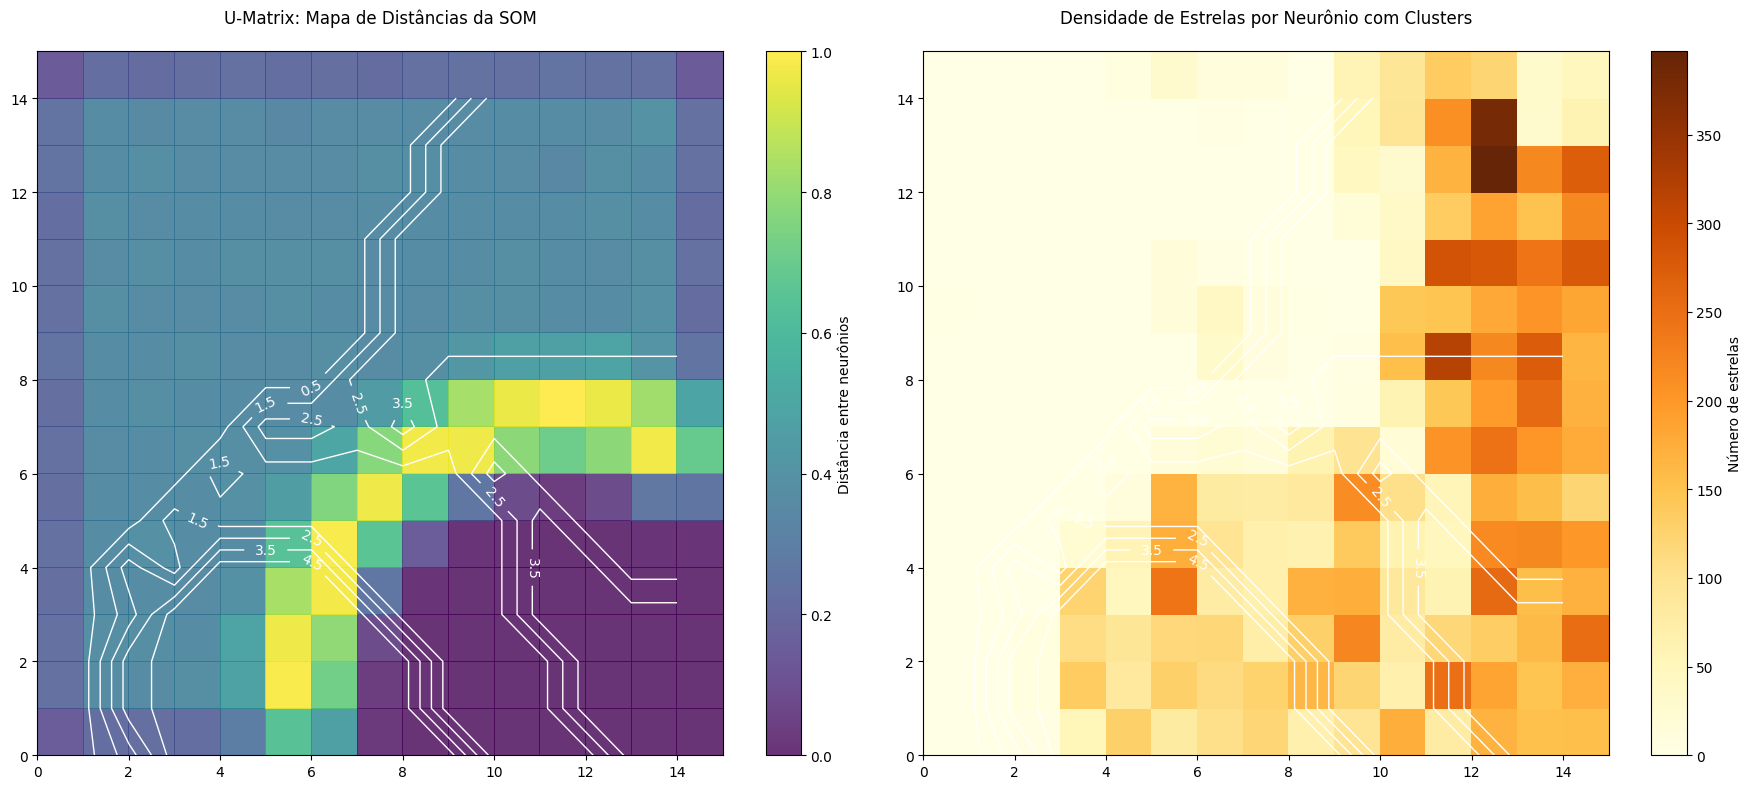

In [52]:
# Visualização melhorada da U-Matrix e densidade

plt.figure(figsize=(18, 8))

# Subplot 1: U-Matrix
plt.subplot(1, 2, 1)
plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix: Mapa de Distâncias da SOM', pad=20)

# Adicionar contornos dos clusters identificados
contour = plt.contour(clusters_neurônios.T, levels=np.arange(-0.5, n_clusters),
                     colors='white', linewidths=1)
plt.clabel(contour, inline=True, fontsize=10)

# Subplot 2: Densidade com clusters
plt.subplot(1, 2, 2)
plt.pcolor(contagem.T, cmap='YlOrBr')
plt.colorbar(label='Número de estrelas')
plt.title('Densidade de Estrelas por Neurônio com Clusters', pad=20)

# Adicionar os mesmos contornos
contour = plt.contour(clusters_neurônios.T, levels=np.arange(-0.5, n_clusters),
                     colors='white', linewidths=1)
plt.clabel(contour, inline=True, fontsize=10)

plt.tight_layout()
plt.show()

### 10.3 Experimentos com Diferentes Configurações

Vamos criar uma função para testar diferentes configurações:


Testando configuração: {'x': 15, 'y': 15, 'sigma': 1.5, 'learning_rate': 0.5, 'epochs': 2000}


100%|██████████| 2000/2000 [04:54<00:00,  6.78it/s]


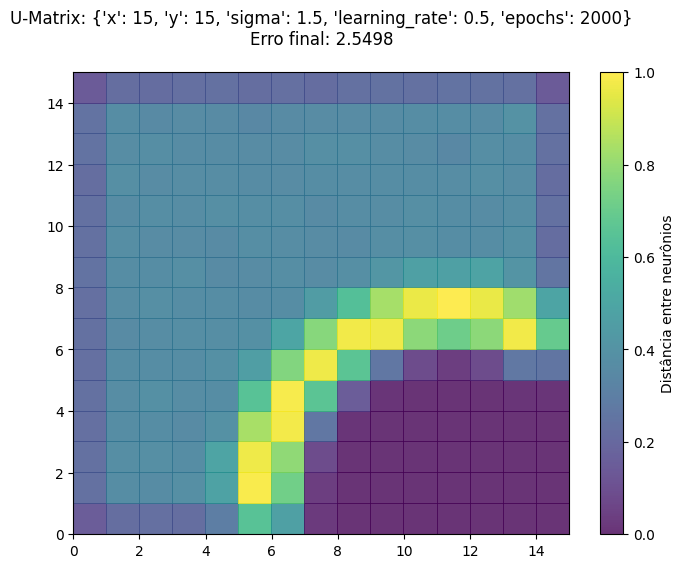


Testando configuração: {'x': 15, 'y': 15, 'sigma': 1.0, 'learning_rate': 0.3, 'epochs': 2000}


100%|██████████| 2000/2000 [04:52<00:00,  6.85it/s]


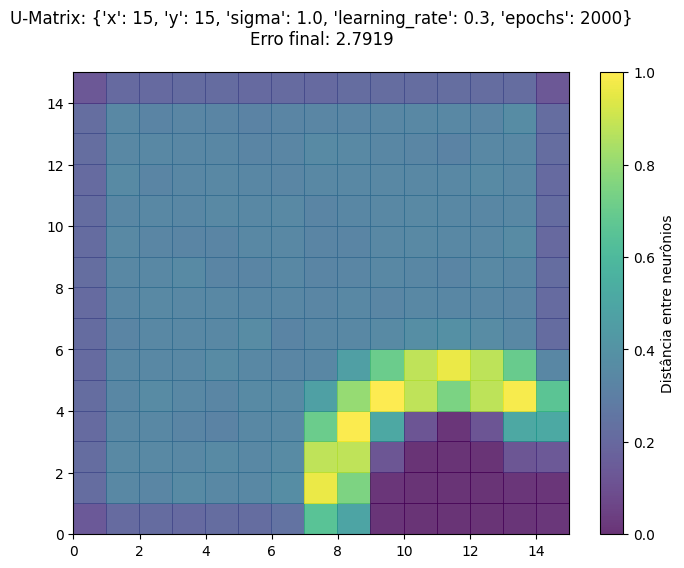


Testando configuração: {'x': 20, 'y': 20, 'sigma': 2.0, 'learning_rate': 0.7, 'epochs': 3000}


100%|██████████| 3000/3000 [10:29<00:00,  4.77it/s]


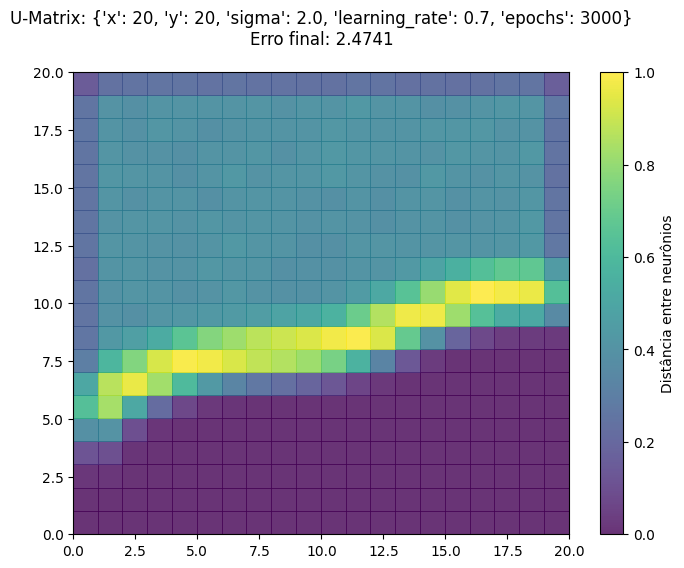


Testando configuração: {'x': 10, 'y': 10, 'sigma': 1.2, 'learning_rate': 0.4, 'epochs': 1500}


100%|██████████| 1500/1500 [02:24<00:00, 10.37it/s]


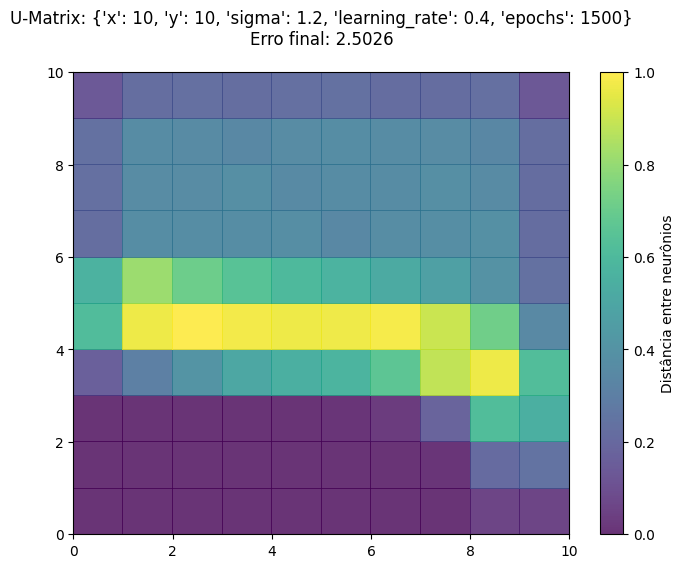


Comparação de erros finais:
Config 1: {'x': 15, 'y': 15, 'sigma': 1.5, 'learning_rate': 0.5, 'epochs': 2000} - Erro: 2.5498
Config 2: {'x': 15, 'y': 15, 'sigma': 1.0, 'learning_rate': 0.3, 'epochs': 2000} - Erro: 2.7919
Config 3: {'x': 20, 'y': 20, 'sigma': 2.0, 'learning_rate': 0.7, 'epochs': 3000} - Erro: 2.4741
Config 4: {'x': 10, 'y': 10, 'sigma': 1.2, 'learning_rate': 0.4, 'epochs': 1500} - Erro: 2.5026


In [53]:
def test_som_configurations(data, configs):
    results = []

    for config in configs:
        print(f"\nTestando configuração: {config}")

        # Inicializar SOM
        som = MiniSom(config['x'], config['y'], data.shape[1],
                     sigma=config['sigma'],
                     learning_rate=config['learning_rate'],
                     neighborhood_function='gaussian',
                     random_seed=42)

        # Treinar e registrar erros
        errors = train_som_with_tracking(som, data, config['epochs'])

        # Resultados
        results.append({
            'config': config,
            'som': som,
            'errors': errors,
            'final_error': errors[-1]
        })

        # Plotar U-Matrix
        plt.figure(figsize=(8, 6))
        plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
        plt.colorbar(label='Distância entre neurônios')
        plt.title(f"U-Matrix: {config}\nErro final: {errors[-1]:.4f}", pad=20)
        plt.show()

    return results

# Configurações para testar
configurations = [
    {'x': 15, 'y': 15, 'sigma': 1.5, 'learning_rate': 0.5, 'epochs': 2000},
    {'x': 15, 'y': 15, 'sigma': 1.0, 'learning_rate': 0.3, 'epochs': 2000},
    {'x': 20, 'y': 20, 'sigma': 2.0, 'learning_rate': 0.7, 'epochs': 3000},
    {'x': 10, 'y': 10, 'sigma': 1.2, 'learning_rate': 0.4, 'epochs': 1500}
]

# Executar testes
results = test_som_configurations(dados, configurations)

# Mostrar comparação de erros finais
print("\nComparação de erros finais:")
for i, res in enumerate(results):
    print(f"Config {i+1}: {res['config']} - Erro: {res['final_error']:.4f}")

### 10.4 Análise dos Pontos de Amostra

Vamos modificar a visualização para entender melhor a distribuição:

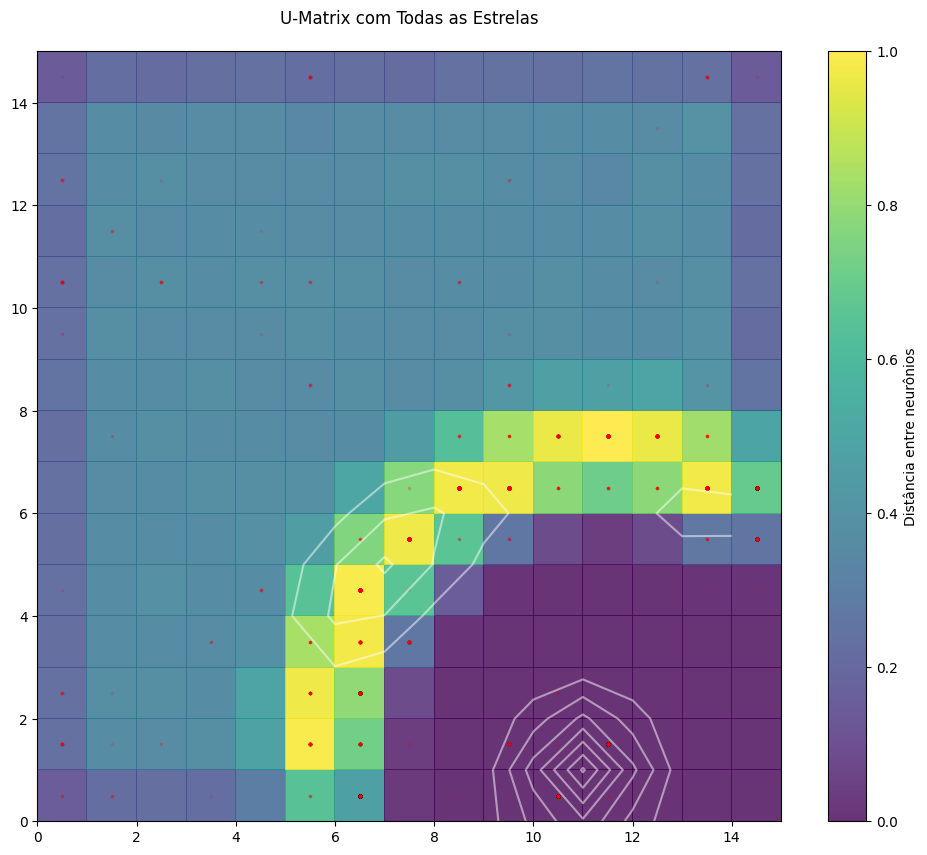

In [54]:
# Visualização melhorada da distribuição dos dados na SOM

# Obter todas as coordenadas (não apenas amostra)
coordenadas_completas = np.array([som.winner(x) for x in dados])

# Plotar
plt.figure(figsize=(12, 10))
plt.pcolor(som.distance_map().T, cmap='viridis', alpha=0.8)
plt.colorbar(label='Distância entre neurônios')
plt.title('U-Matrix com Todas as Estrelas', pad=20)

# Plotar todas as estrelas com transparência
for x, y in coordenadas_completas:
    plt.plot(x+0.5, y+0.5, 'r.', markersize=3, alpha=0.1)

# Adicionar densidade como contorno
from scipy.ndimage import gaussian_filter
density = np.zeros((tamanho_x, tamanho_y))
for x, y in coordenadas_completas:
    density[x, y] += 1
density = gaussian_filter(density, sigma=0.8)
plt.contour(density.T, colors='white', alpha=0.5)

plt.show()

### 11. Rede SOM: Variações e Análises

#### 11.1. Análise do Cluster 0 com Ferramentas de VO

In [55]:
# Primeiro, vamos carregar os dados originais e normalizados
df_original = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')
df_normalizado = pd.read_csv('/content/cores_normalizadas_todas_as_estrelas.csv')

# Verificar se os DataFrames têm o mesmo número de linhas
print(f"Original: {len(df_original)} linhas")
print(f"Normalizado: {len(df_normalizado)} linhas")

# Adicionar colunas de paralaxe do original ao normalizado
colunas_paralaxe = ['Plx', 'e_Plx', 'erro_relativo_paralaxe']

# Verificar quais colunas de paralaxe existem no original
colunas_existentes = [col for col in colunas_paralaxe if col in df_original.columns]
print(f"Colunas de paralaxe encontradas: {colunas_existentes}")

# Adicionar as colunas de paralaxe ao DataFrame normalizado
for coluna in colunas_existentes:
    df_normalizado[coluna] = df_original[coluna].values

# Salvar o novo arquivo combinado (opcional)
df_combinado = df_normalizado.copy()
df_combinado.to_csv('/content/dados_normalizados_com_paralaxe.csv', index=False)
print("Arquivo combinado salvo: '/content/dados_normalizados_com_paralaxe.csv'")

# Agora modificar a função analisar_cluster_diferente para usar o DataFrame combinado
def analisar_cluster_diferente(df_completo, df_resultado, cluster_col='Cluster'):
    """
    Analisa o cluster menor (diferente) em detalhe usando dados completos
    """
    # Encontrar o cluster menor
    cluster_counts = df_resultado[cluster_col].value_counts()
    cluster_diferente = cluster_counts.idxmin()

    print(f"=== ANÁLISE DO CLUSTER DIFERENTE ({cluster_diferente}) ===")
    print(f"Tamanho: {cluster_counts.min()} estrelas ({cluster_counts.min()/len(df_resultado)*100:.1f}%)")

    # Obter índices das estrelas no cluster diferente
    indices_diferente = df_resultado[df_resultado[cluster_col] == cluster_diferente].index

    # Analisar propriedades dessas estrelas
    estrelas_diferente = df_completo.iloc[indices_diferente].copy()

    print("\nEstatísticas das estrelas do cluster diferente:")

    # Analisar paralaxe
    if 'Plx' in df_completo.columns:
        print("\nParalaxes:")
        print(estrelas_diferente['Plx'].describe())

        # Estatísticas adicionais úteis
        print(f"\nParalaxe média: {estrelas_diferente['Plx'].mean():.3f} ")
        print(f"Desvio padrão: {estrelas_diferente['Plx'].std():.3f} ")
        print(f"Valor mínimo: {estrelas_diferente['Plx'].min():.3f} ")
        print(f"Valor máximo: {estrelas_diferente['Plx'].max():.3f} ")

    # Analisar erro de paralaxe
    if 'e_Plx' in df_completo.columns:
        print("\nErros de paralaxe:")
        print(estrelas_diferente['e_Plx'].describe())

    # Analisar erro relativo de paralaxe
    if 'erro_relativo_paralaxe' in df_completo.columns:
        print("\nErros relativos de paralaxe:")
        print(estrelas_diferente['erro_relativo_paralaxe'].describe())

        # Contar estrelas com erro relativo alto (potencialmente problemáticas)
        alto_erro = (estrelas_diferente['erro_relativo_paralaxe'] > 0.2).sum()
        print(f"Estrelas com erro relativo > 20%: {alto_erro} ({alto_erro/len(estrelas_diferente)*100:.1f}%)")

    # Verificar se há valores extremos nas fotometrias
    fotometria_cols = [f'Fotometria_{i+1}' for i in range(57)]
    fotometria_cols_existentes = [col for col in fotometria_cols if col in estrelas_diferente.columns]

    if fotometria_cols_existentes:
        print(f"\nEstatísticas das fotometrias do cluster diferente ({len(fotometria_cols_existentes)} colunas):")
        stats_fotometria = estrelas_diferente[fotometria_cols_existentes].describe().T
        print(stats_fotometria[['mean', 'std', 'min', 'max']].head(10))

        # Verificar valores extremos
        for col in fotometria_cols_existentes[:5]:  # Primeiras 5 colunas
            q1 = estrelas_diferente[col].quantile(0.25)
            q3 = estrelas_diferente[col].quantile(0.75)
            iqr = q3 - q1
            outliers = ((estrelas_diferente[col] < (q1 - 1.5 * iqr)) |
                       (estrelas_diferente[col] > (q3 + 1.5 * iqr))).sum()
            print(f"Outliers em {col}: {outliers}")

    return estrelas_diferente, indices_diferente

Original: 17378 linhas
Normalizado: 17378 linhas
Colunas de paralaxe encontradas: ['Plx', 'e_Plx', 'erro_relativo_paralaxe']
Arquivo combinado salvo: '/content/dados_normalizados_com_paralaxe.csv'


In [56]:
# Carregar o arquivo combinado
df_combinado = pd.read_csv('/content/dados_normalizados_com_paralaxe.csv')

# Exibir as primeiras 10 linhas
print("=== PRIMEIRAS 10 LINHAS DO ARQUIVO COMBINADO ===")
print(f"Shape do DataFrame: {df_combinado.shape}")
print(f"Total de colunas: {len(df_combinado.columns)}")
print("\n" + "="*80)

# Lista das colunas de fotometria (bandas fotométricas)
colunas_fotometria = [
    'uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450',
    'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540',
    'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630',
    'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720',
    'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810',
    'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900',
    'J0910', 'J1007', 'iSDSS'
]

# Verificar quais colunas de fotometria realmente existem no DataFrame
colunas_fotometria_existentes = [col for col in colunas_fotometria if col in df_combinado.columns]
print(f" Colunas de fotometria encontradas: {len(colunas_fotometria_existentes)}")
print(f"Bandas fotométricas: {colunas_fotometria_existentes}")

# Colunas para exibir (paralaxe + identificação + primeiras bandas)
colunas_exibir = []

# Adicionar colunas de paralaxe
for col in ['Plx', 'e_Plx', 'erro_relativo_paralaxe']:
    if col in df_combinado.columns:
        colunas_exibir.append(col)

# Adicionar colunas de identificação
colunas_id = [col for col in ['TILE_ID', 'NUMBER', 'ID', 'SOURCE_ID'] if col in df_combinado.columns]
colunas_exibir.extend(colunas_id)

# Adicionar primeiras 5 bandas fotométricas
if len(colunas_fotometria_existentes) >= 5:
    colunas_exibir.extend(colunas_fotometria_existentes[:5])
elif colunas_fotometria_existentes:
    colunas_exibir.extend(colunas_fotometria_existentes)

print(f"\n Colunas que serão exibidas: {colunas_exibir}")
print("\n" + "="*80)

# Exibir as primeiras 10 linhas com as colunas selecionadas
print("PRIMEIRAS 10 ESTRELAS:")
with pd.option_context('display.width', None, 'display.max_columns', None):
    display(df_combinado[colunas_exibir].head(10))

print("\n" + "="*80)
print(" INFORMAÇÕES DETALHADAS:")

# Estatísticas das colunas de paralaxe
if 'Plx' in df_combinado.columns:
    print(f"\n PARALAXE (Plx):")
    print(f"   Valores não nulos: {df_combinado['Plx'].count()}/{len(df_combinado)}")
    print(f"   Média: {df_combinado['Plx'].mean():.4f} ± {df_combinado['Plx'].std():.4f} ")
    print(f"   Range: [{df_combinado['Plx'].min():.4f}, {df_combinado['Plx'].max():.4f}] ")
    print(f"   Mediana: {df_combinado['Plx'].median():.4f} ")

if 'e_Plx' in df_combinado.columns:
    print(f"\n ERRO DE PARALAXE (e_Plx):")
    print(f"   Média: {df_combinado['e_Plx'].mean():.4f} ")
    print(f"   Erro médio relativo: {(df_combinado['e_Plx'] / df_combinado['Plx']).mean():.3f}")

if 'erro_relativo_paralaxe' in df_combinado.columns:
    print(f"\n ERRO RELATIVO DE PARALAXE:")
    print(f"   Média: {df_combinado['erro_relativo_paralaxe'].mean():.3f}")
    alto_erro = (df_combinado['erro_relativo_paralaxe'] > 0.2).sum()
    print(f"   Estrelas com erro > 20%: {alto_erro} ({alto_erro/len(df_combinado)*100:.1f}%)")

# Estatísticas das fotometrias
if colunas_fotometria_existentes:
    print(f"\n ESTATÍSTICAS DAS BANDAS FOTOMÉTRICAS:")
    print(f"   Total de bandas: {len(colunas_fotometria_existentes)}")

    # Agrupar bandas por tipo para melhor análise
    bandas_u = [b for b in colunas_fotometria_existentes if b.startswith('u') or b.startswith('J03')]
    bandas_vis = [b for b in colunas_fotometria_existentes if b.startswith('J04') or b.startswith('J05') or b.startswith('J06')]
    bandas_ir = [b for b in colunas_fotometria_existentes if b.startswith('J07') or b.startswith('J08') or b.startswith('J09') or b.startswith('J10') or b == 'iSDSS']

    print(f"   Bandas UV/azuis: {len(bandas_u)}")
    print(f"   Bandas visuais: {len(bandas_vis)}")
    print(f"   Bandas IR: {len(bandas_ir)}")

    # Estatísticas das primeiras bandas de cada grupo
    print(f"\n EXEMPLOS DE BANDAS:")
    for banda in colunas_fotometria_existentes[:3] + colunas_fotometria_existentes[25:28] + colunas_fotometria_existentes[-3:]:
        if banda in df_combinado.columns:
            print(f"   {banda}: {df_combinado[banda].mean():.3f} ± {df_combinado[banda].std():.3f}")

# Verificar valores nulos
print(f"\n VALORES NULOS:")
print(f"   Paralaxe nulas: {df_combinado['Plx'].isnull().sum() if 'Plx' in df_combinado.columns else 'N/A'}")
if colunas_fotometria_existentes:
    nulos_fotometria = df_combinado[colunas_fotometria_existentes].isnull().sum().sum()
    print(f"   Valores nulos em fotometrias: {nulos_fotometria}")

# Mostrar informações do dataset completo
print(f"\n INFORMAÇÕES DO DATASET:")
print(f"   Total de estrelas: {len(df_combinado)}")
print(f"   Total de colunas: {len(df_combinado.columns)}")
print(f"   Colunas não-fotometria: {len(df_combinado.columns) - len(colunas_fotometria_existentes)}")

# Listar todas as colunas não-fotometria
colunas_nao_fotometria = [col for col in df_combinado.columns if col not in colunas_fotometria_existentes]
print(f"\n COLUNAS NÃO-FOTOMETRIA:")
print(colunas_nao_fotometria)

=== PRIMEIRAS 10 LINHAS DO ARQUIVO COMBINADO ===
Shape do DataFrame: (17378, 61)
Total de colunas: 61

 Colunas de fotometria encontradas: 57
Bandas fotométricas: ['uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540', 'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630', 'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720', 'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810', 'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900', 'J0910', 'J1007', 'iSDSS']

 Colunas que serão exibidas: ['Plx', 'e_Plx', 'erro_relativo_paralaxe', 'uJAVA', 'J0378', 'J0390', 'J0400', 'J0410']

PRIMEIRAS 10 ESTRELAS:


,Plx,e_Plx,erro_relativo_paralaxe,uJAVA,J0378,J0390,J0400,J0410
0,1.2200,0.1069,8.762295,3.758,3.724,3.593,2.819,2.388
1,0.0947,0.0181,19.112989,1.436,0.380,0.136,-0.131,-0.126
2,1.2176,0.0145,1.190867,2.506,2.164,2.096,1.493,1.223
3,0.5735,0.0212,3.696600,1.933,1.341,1.350,1.043,0.824
4,0.7961,0.0181,2.273584,1.763,1.596,1.595,1.191,0.930
5,0.6792,0.1263,18.595408,5.250,4.334,3.873,3.264,3.040
6,2.3202,0.0855,3.685027,2.139,2.054,2.054,1.552,1.241
7,0.9902,0.0256,2.585336,2.480,2.498,2.412,1.746,1.430
8,0.3066,0.0605,19.732550,1.196,0.995,0.949,0.709,0.585
9,1.3256,0.1725,13.012975,3.690,3.870,3.564,2.845,2.404



 INFORMAÇÕES DETALHADAS:

 PARALAXE (Plx):
   Valores não nulos: 17378/17378
   Média: 1.4325 ± 1.4621 
   Range: [0.0599, 23.5386] 
   Mediana: 1.0192 

 ERRO DE PARALAXE (e_Plx):
   Média: 0.0720 
   Erro médio relativo: 0.073

 ERRO RELATIVO DE PARALAXE:
   Média: 7.319
   Estrelas com erro > 20%: 17289 (99.5%)

 ESTATÍSTICAS DAS BANDAS FOTOMÉTRICAS:
   Total de bandas: 57
   Bandas UV/azuis: 3
   Bandas visuais: 30
   Bandas IR: 24

 EXEMPLOS DE BANDAS:
   uJAVA: 3.338 ± 1.499
   J0378: 3.208 ± 1.481
   J0390: 3.114 ± 1.391
   J0620: 0.599 ± 0.598
   J0630: 0.508 ± 0.527
   J0640: 0.410 ± 0.406
   J0910: -0.264 ± 0.228
   J1007: -0.268 ± 0.284
   iSDSS: 0.000 ± 0.000

 VALORES NULOS:
   Paralaxe nulas: 0
   Valores nulos em fotometrias: 0

 INFORMAÇÕES DO DATASET:
   Total de estrelas: 17378
   Total de colunas: 61
   Colunas não-fotometria: 4

 COLUNAS NÃO-FOTOMETRIA:
['Estrela', 'Plx', 'e_Plx', 'erro_relativo_paralaxe']


In [57]:
# Preparar dados VO
def preparar_dados_vo(df_completo, indices_diferente):
    """
    Prepara dados para consultas VO de forma segura usando dados completos
    """
    colunas_disponiveis = df_completo.columns.tolist()

    # Procurar colunas de identificação
    colunas_id = []
    for col in ['TILE_ID', 'NUMBER', 'ID', 'SOURCE_ID', 'GAIA_ID']:
        if col in colunas_disponiveis:
            colunas_id.append(col)

    # Incluir também informações de paralaxe para análise
    colunas_analise = []
    for col in ['Plx', 'e_Plx', 'erro_relativo_paralaxe']:
        if col in colunas_disponiveis:
            colunas_analise.append(col)

    colunas_exportar = colunas_id + colunas_analise

    if colunas_exportar:
        dados_vo = df_completo.loc[indices_diferente, colunas_exportar].copy()
        dados_vo['Cluster'] = 'Diferente'
        nome_arquivo = 'estrelas_cluster_diferente_completo.csv'
        dados_vo.to_csv(nome_arquivo, index=False)
        print(f"\nArquivo '{nome_arquivo}' criado com {len(dados_vo)} estrelas")
        print(f"Colunas incluídas: {colunas_exportar}")
        return dados_vo
    else:
        print("\nNenhuma coluna de identificação encontrada")
        dados_vo = pd.DataFrame({'Indice_Original': indices_diferente})
        dados_vo['Cluster'] = 'Diferente'
        nome_arquivo = 'estrelas_cluster_diferente_indices.csv'
        dados_vo.to_csv(nome_arquivo, index=False)
        return dados_vo

# Executar análise com os dados combinados
print("Iniciando análise do cluster diferente com dados completos...")
estrelas_diferente, indices_diferente = analisar_cluster_diferente(df_combinado, df_resultado)

# Preparar dados para consultas VO
print("\nPreparando dados completos para consultas VO...")
dados_vo = preparar_dados_vo(df_combinado, indices_diferente)

# Mostrar preview dos dados VO
print("\nPreview dos dados para VO:")
print(dados_vo.head())

Iniciando análise do cluster diferente com dados completos...
=== ANÁLISE DO CLUSTER DIFERENTE (0) ===
Tamanho: 256 estrelas (1.5%)

Estatísticas das estrelas do cluster diferente:

Paralaxes:
count    256.000000
mean       3.413772
std        2.607301
min        0.094700
25%        1.700400
50%        2.993250
75%        4.482425
max       13.680300
Name: Plx, dtype: float64

Paralaxe média: 3.414 
Desvio padrão: 2.607 
Valor mínimo: 0.095 
Valor máximo: 13.680 

Erros de paralaxe:
count    256.000000
mean       0.091584
std        0.148421
min        0.009800
25%        0.012675
50%        0.016200
75%        0.096475
max        0.877600
Name: e_Plx, dtype: float64

Erros relativos de paralaxe:
count    256.000000
mean       4.046209
std        5.321422
min        0.086358
25%        0.381461
50%        0.964936
75%        6.496045
max       19.303532
Name: erro_relativo_paralaxe, dtype: float64
Estrelas com erro relativo > 20%: 242 (94.5%)

Preparando dados completos para consultas 

In [58]:
# Preparar dados VO com fotometrias
def preparar_dados_vo_com_fotometrias(df_completo, indices_diferente):
    """
    Prepara dados para consultas VO incluindo todas as fotometrias normalizadas
    """
    colunas_disponiveis = df_completo.columns.tolist()

    # Procurar colunas de identificação
    colunas_id = []
    for col in ['TILE_ID', 'NUMBER', 'ID', 'SOURCE_ID', 'GAIA_ID']:
        if col in colunas_disponiveis:
            colunas_id.append(col)

    # Incluir informações de paralaxe para análise
    colunas_analise = []
    for col in ['Plx', 'e_Plx', 'erro_relativo_paralaxe']:
        if col in colunas_disponiveis:
            colunas_analise.append(col)

    # Incluir TODAS as bandas fotométricas normalizadas
    colunas_fotometria = [
        'uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450',
        'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540',
        'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630',
        'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720',
        'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810',
        'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900',
        'J0910', 'J1007', 'iSDSS'
    ]

    colunas_fotometria_existentes = [col for col in colunas_fotometria if col in colunas_disponiveis]
    print(f"Bandas fotométricas encontradas: {len(colunas_fotometria_existentes)}")

    # Combinar todas as colunas para exportação
    colunas_exportar = colunas_id + colunas_analise + colunas_fotometria_existentes

    if colunas_exportar:
        dados_vo = df_completo.loc[indices_diferente, colunas_exportar].copy()
        dados_vo['Cluster'] = 'Diferente'
        nome_arquivo = 'estrelas_cluster_diferente_completo_com_fotometrias.csv'
        dados_vo.to_csv(nome_arquivo, index=False)
        print(f"\n Arquivo '{nome_arquivo}' criado com {len(dados_vo)} estrelas")
        print(f" Total de colunas: {len(colunas_exportar)}")
        print(f" Colunas de identificação: {colunas_id}")
        print(f" Colunas de paralaxe: {colunas_analise}")
        print(f" Colunas de fotometria: {len(colunas_fotometria_existentes)} bandas")
        print(f" Primeiras 5 bandas: {colunas_fotometria_existentes[:5]}")
        return dados_vo
    else:
        print("\n Nenhuma coluna de identificação encontrada")
        dados_vo = pd.DataFrame({'Indice_Original': indices_diferente})
        dados_vo['Cluster'] = 'Diferente'
        nome_arquivo = 'estrelas_cluster_diferente_indices.csv'
        dados_vo.to_csv(nome_arquivo, index=False)
        return dados_vo

# Versão alternativa se quiser um arquivo mais compacto (apenas algumas bandas)
def preparar_dados_vo_compacto(df_completo, indices_diferente, n_bandas=10):
    """
    Prepara dados VO com um subconjunto das bandas fotométricas
    """
    colunas_disponiveis = df_completo.columns.tolist()

    # Colunas básicas
    colunas_id = []
    for col in ['TILE_ID', 'NUMBER', 'ID', 'SOURCE_ID', 'GAIA_ID']:
        if col in colunas_disponiveis:
            colunas_id.append(col)

    colunas_analise = []
    for col in ['Plx', 'e_Plx', 'erro_relativo_paralaxe']:
        if col in colunas_disponiveis:
            colunas_analise.append(col)

    # Selecionar um subconjunto de bandas fotométricas
    colunas_fotometria = [
        'uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450',
        'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540',
        'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630',
        'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720',
        'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810',
        'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900',
        'J0910', 'J1007', 'iSDSS'
    ]

    colunas_fotometria_existentes = [col for col in colunas_fotometria if col in colunas_disponiveis]
    # Selecionar bandas estrategicamente distribuídas
    bandas_selecionadas = []
    if colunas_fotometria_existentes:
        step = max(1, len(colunas_fotometria_existentes) // n_bandas)
        bandas_selecionadas = colunas_fotometria_existentes[::step][:n_bandas]
        # Garantir que temos bandas representativas
        if 'uJAVA' in colunas_fotometria_existentes and 'uJAVA' not in bandas_selecionadas:
            bandas_selecionadas.append('uJAVA')
        if 'iSDSS' in colunas_fotometria_existentes and 'iSDSS' not in bandas_selecionadas:
            bandas_selecionadas.append('iSDSS')

    colunas_exportar = colunas_id + colunas_analise + bandas_selecionadas

    if colunas_exportar:
        dados_vo = df_completo.loc[indices_diferente, colunas_exportar].copy()
        dados_vo['Cluster'] = 'Diferente'
        nome_arquivo = f'estrelas_cluster_diferente_compacto_{n_bandas}bandas.csv'
        dados_vo.to_csv(nome_arquivo, index=False)
        print(f"\n Arquivo compacto '{nome_arquivo}' criado")
        print(f" Bandas incluídas: {bandas_selecionadas}")
        return dados_vo

# Executar análise com os dados combinados
print("Iniciando análise do cluster diferente com dados completos...")
estrelas_diferente, indices_diferente = analisar_cluster_diferente(df_combinado, df_resultado)

# Preparar dados para consultas VO com TODAS as fotometrias
print("\nPreparando dados completos para consultas VO com fotometrias...")
dados_vo_completo = preparar_dados_vo_com_fotometrias(df_combinado, indices_diferente)

# Preparar também uma versão compacta
print("\nPreparando versão compacta para análise rápida...")
dados_vo_compacto = preparar_dados_vo_compacto(df_combinado, indices_diferente, n_bandas=15)

# Mostrar preview dos dados VO completos
print("\nPreview dos dados VO completos (primeiras 5 colunas de fotometria):")
colunas_fotometria_preview = [col for col in dados_vo_completo.columns if col in [
    'uJAVA', 'J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450'
]]
colunas_preview = ['TILE_ID', 'NUMBER', 'Plx'] + colunas_fotometria_preview[:3] + ['Cluster']
colunas_preview = [col for col in colunas_preview if col in dados_vo_completo.columns]

print(dados_vo_completo[colunas_preview].head())

# Mostrar informações sobre os arquivos gerados
print(f"\n ARQUIVOS GERADOS:")
print(f"1. estrelas_cluster_diferente_completo_com_fotometrias.csv")
print(f"   - Contém TODAS as {len([col for col in dados_vo_completo.columns if col not in ['Cluster']])-3} bandas fotométricas")
print(f"   - {len(dados_vo_completo)} estrelas do cluster diferente")
print(f"   - Inclui paralaxe e identificadores")

print(f"\n2. estrelas_cluster_diferente_compacto_15bandas.csv")
print(f"   - Versão compacta com 15 bandas representativas")
print(f"   - Ideal para análise rápida")

print(f"\n Os arquivos estão prontos para consultas VO e análise detalhada!")

Iniciando análise do cluster diferente com dados completos...
=== ANÁLISE DO CLUSTER DIFERENTE (0) ===
Tamanho: 256 estrelas (1.5%)

Estatísticas das estrelas do cluster diferente:

Paralaxes:
count    256.000000
mean       3.413772
std        2.607301
min        0.094700
25%        1.700400
50%        2.993250
75%        4.482425
max       13.680300
Name: Plx, dtype: float64

Paralaxe média: 3.414 
Desvio padrão: 2.607 
Valor mínimo: 0.095 
Valor máximo: 13.680 

Erros de paralaxe:
count    256.000000
mean       0.091584
std        0.148421
min        0.009800
25%        0.012675
50%        0.016200
75%        0.096475
max        0.877600
Name: e_Plx, dtype: float64

Erros relativos de paralaxe:
count    256.000000
mean       4.046209
std        5.321422
min        0.086358
25%        0.381461
50%        0.964936
75%        6.496045
max       19.303532
Name: erro_relativo_paralaxe, dtype: float64
Estrelas com erro relativo > 20%: 242 (94.5%)

Preparando dados completos para consultas 

#### 11.3. Análise dos Perfis do Cluster Diferente

In [59]:
# Hipóteses sobre a natureza do cluster diferente
def sugerir_hipoteses(media_diferente, diferencas, filter_names):
    """
    Sugere hipóteses sobre o que pode ser o cluster diferente
    """
    print("\n=== HIPÓTESES SOBRE O CLUSTER DIFERENTE ===")

    # Verificar se há picos em bandas específicas
    bandas_j = [i for i, nome in enumerate(filter_names) if nome.startswith('J')]
    bandas_especiais = [i for i, nome in enumerate(filter_names) if any(x in nome for x in ['uJAVA', 'iSDSS', 'gSDSS'])]

    # Hipótese 1: Objetos com emissão em bandas específicas
    picos_proeminentes = np.where(np.abs(diferencas) > 0.5)[0]
    if len(picos_proeminentes) > 0:
        print("Hipótese 1: Objetos com características espectrais específicas")
        print("Bandas com diferenças significativas:")
        for idx in picos_proeminentes:
            print(f"  - {filter_names[idx]}: {diferencas[idx]:.3f}")
    else:
        print("Hipótese 1: Não foram encontrados picos proeminentes em bandas específicas")

    # Hipótese 2: Objetos extragalácticos
    media_absoluta = np.mean(np.abs(media_diferente))
    if media_absoluta > 1.0:
        print(f"Hipótese 2: Possíveis objetos extragalácticos (valores absolutos altos: {media_absoluta:.3f})")
    else:
        print(f"Hipótese 2: Não são prováveis objetos extragalácticos (média absoluta: {media_absoluta:.3f})")

    # Hipótese 3: Artefatos ou dados problemáticos
    tem_nan = np.any(np.isnan(media_diferente))
    tem_valores_extremos = np.any(np.abs(media_diferente) > 10)

    if tem_nan or tem_valores_extremos:
        print("Hipótese 3: Possíveis artefatos ou dados com problemas de medição")
        if tem_nan:
            print("  - Contém valores NaN")
        if tem_valores_extremos:
            valores_extremos = media_diferente[np.abs(media_diferente) > 10]
            print(f"  - Contém {len(valores_extremos)} valores extremos (>10)")
    else:
        print("Hipótese 3: Não foram encontrados artefatos ou dados problemáticos evidentes")

    # Hipótese 4: Tipos espectrais raros
    # Analisar a forma do perfil para ver se sugere tipos espectrais específicos
    variabilidade = np.std(media_diferente)
    range_valores = np.max(media_diferente) - np.min(media_diferente)

    print("Hipótese 4: Estrelas de tipos espectrais raros ou em estágios evolutivos especiais")
    print(f"  - Variabilidade do perfil: {variabilidade:.3f}")
    print(f"  - Amplitude do perfil: {range_valores:.3f}")

    # Verificar se há características sugestivas de tipos específicos
    bandas_azuis = [i for i, nome in enumerate(filter_names) if any(x in nome for x in ['uJAVA', 'J0378', 'J0390', 'J0400'])]
    bandas_vermelhas = [i for i, nome in enumerate(filter_names) if any(x in nome for x in ['J0860', 'J0870', 'J0880', 'J0890', 'J0900'])]

    if len(bandas_azuis) > 0 and len(bandas_vermelhas) > 0:
        media_azul = np.mean(media_diferente[bandas_azuis]) if bandas_azuis else 0
        media_vermelha = np.mean(media_diferente[bandas_vermelhas]) if bandas_vermelhas else 0
        cor_azul_vermelho = media_azul - media_vermelha

        print(f"  - Cor azul-vermelho aproximada: {cor_azul_vermelho:.3f}")

        if cor_azul_vermelho > 0.5:
            print("  - Sugestão: Objetos mais azuis (estrelas quentes, quasares)")
        elif cor_azul_vermelho < -0.5:
            print("  - Sugestão: Objetos mais vermelhos (estrelas frias, poeira)")
        else:
            print("  - Sem cor predominante evidente")
    else:
        print("  - Não foi possível calcular cor azul-vermelho")

    # Hipótese 5: Verificar consistência interna do cluster
    print("\nHipótese 5: Consistência interna do cluster")
    desvio_interno = np.std(media_diferente)
    if desvio_interno < 0.3:
        print(f"  - Cluster coeso (desvio interno baixo: {desvio_interno:.3f})")
    else:
        print(f"  - Cluster pode conter subgrupos (desvio interno: {desvio_interno:.3f})")

    return picos_proeminentes

In [60]:
# Versão melhorada da análise de perfis
def analisar_perfis_cluster_diferente(dados, df_resultado, filter_names, cluster_col='Cluster'):
    """
    Analisa os perfis fotométricos do cluster diferente
    """
    # Encontrar cluster menor
    cluster_diferente = df_resultado[cluster_col].value_counts().idxmin()
    indices_diferente = df_resultado[df_resultado[cluster_col] == cluster_diferente].index

    print(f"Analisando cluster {cluster_diferente} com {len(indices_diferente)} estrelas")

    # Obter dados do cluster diferente
    dados_diferente = dados[indices_diferente]

    # Calcular média e desvio padrão
    media_diferente = np.mean(dados_diferente, axis=0)
    desvio_diferente = np.std(dados_diferente, axis=0)

    # Comparar com a média geral
    media_geral = np.mean(dados, axis=0)

    # Plotar comparação
    plt.figure(figsize=(15, 8))

    # Cluster diferente
    plt.plot(filter_names, media_diferente, 'r-', linewidth=2, label='Cluster Diferente')
    plt.fill_between(filter_names, media_diferente - desvio_diferente,
                    media_diferente + desvio_diferente, alpha=0.2, color='red')

    # Média geral
    plt.plot(filter_names, media_geral, 'b-', linewidth=2, label='Média Geral')

    plt.xlabel('Banda Fotométrica')
    plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)')
    plt.title('Comparação: Cluster Diferente vs Média Geral')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Identificar bandas com maiores diferenças
    diferencas = media_diferente - media_geral
    bandas_mais_diferentes = np.argsort(np.abs(diferencas))[::-1][:10]

    print("Bandas com maiores diferenças em relação à média geral:")
    for i, banda_idx in enumerate(bandas_mais_diferentes):
        print(f"{i+1}. {filter_names[banda_idx]}: {diferencas[banda_idx]:.3f} (diferença absoluta: {abs(diferencas[banda_idx]):.3f})")

    # Analisar formas dos perfis individuais
    print("\nAnálise da variabilidade interna do cluster:")
    if len(dados_diferente) > 1:
        correlacoes = np.corrcoef(dados_diferente)
        variabilidade_interna = np.mean(np.std(dados_diferente, axis=0))
        print(f"Variabilidade média interna: {variabilidade_interna:.3f}")
        print(f"Número de estrelas no cluster: {len(dados_diferente)}")

        # Calcular similaridade média entre perfis
        from scipy.spatial.distance import pdist
        if len(dados_diferente) > 1:
            distancias = pdist(dados_diferente, metric='euclidean')
            similaridade_media = np.mean(distancias)
            print(f"Distância média entre perfis: {similaridade_media:.3f}")
    else:
        print("Cluster muito pequeno para análise de variabilidade interna")
        variabilidade_interna = 0

    return media_diferente, diferencas

Executando análise detalhada dos perfis...
Analisando cluster 0 com 256 estrelas


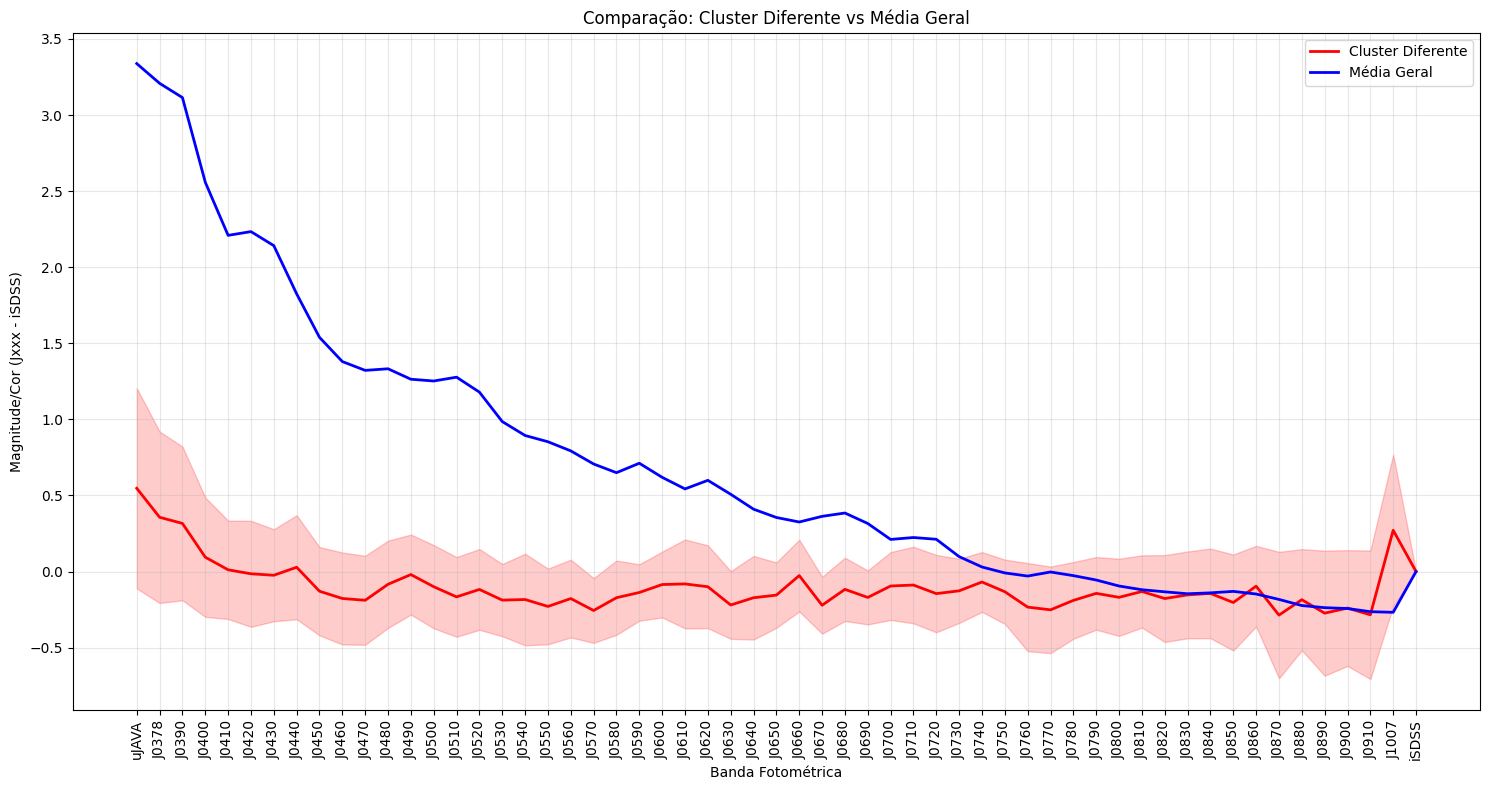

Bandas com maiores diferenças em relação à média geral:
1. J0378: -2.852 (diferença absoluta: 2.852)
2. J0390: -2.798 (diferença absoluta: 2.798)
3. uJAVA: -2.791 (diferença absoluta: 2.791)
4. J0400: -2.464 (diferença absoluta: 2.464)
5. J0420: -2.249 (diferença absoluta: 2.249)
6. J0410: -2.198 (diferença absoluta: 2.198)
7. J0430: -2.166 (diferença absoluta: 2.166)
8. J0440: -1.797 (diferença absoluta: 1.797)
9. J0450: -1.668 (diferença absoluta: 1.668)
10. J0460: -1.557 (diferença absoluta: 1.557)

Análise da variabilidade interna do cluster:
Variabilidade média interna: 0.289
Número de estrelas no cluster: 256
Distância média entre perfis: 3.028

Gerando hipóteses sobre a natureza do cluster...

=== HIPÓTESES SOBRE O CLUSTER DIFERENTE ===
Hipótese 1: Objetos com características espectrais específicas
Bandas com diferenças significativas:
  - uJAVA: -2.791
  - J0378: -2.852
  - J0390: -2.798
  - J0400: -2.464
  - J0410: -2.198
  - J0420: -2.249
  - J0430: -2.166
  - J0440: -1.797
 

In [61]:
# Executar análise de perfis
print("Executando análise detalhada dos perfis...")
media_diferente, diferencas = analisar_perfis_cluster_diferente(dados, df_resultado, filter_names)

# Sugerir hipóteses
print("\nGerando hipóteses sobre a natureza do cluster...")
picos_importantes = sugerir_hipoteses(media_diferente, diferencas, filter_names)

#### 11.4.